# Whole Antarctica Continent

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the data
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv')

# Drop unnecessary columns
df.drop(['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude','land_area'], axis=1, inplace=True)

# Separate features and target
X = df.drop('vegetation_area_ratio', axis=1)
y = df['vegetation_area_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Start to train the model")
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optional: Feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


Start to train the model
Mean Squared Error: 0.00017727674259628666
R^2 Score: 0.7937237335835109
icefree_area_ratio_spatial         0.227738
precipitation_spatial              0.159854
volumetric_soil_water_spatial      0.092124
X10m_wind_speed_spatial            0.078659
temperature_2m_spatial             0.059788
uv_radiation_spatial               0.055454
solar_radiation_spatial            0.053165
vapor_pressure_deficit_spatial     0.045984
Aspect                             0.040820
volumetric_soil_water_residual     0.020622
icefree_area_ratio_residual        0.018760
X10m_wind_speed_residual           0.016498
vapor_pressure_deficit_residual    0.016396
solar_radiation_residual           0.015176
temperature_2m_residual            0.014697
precipitation_residual             0.014137
uv_radiation_residual              0.013990
volumetric_soil_water_temporal     0.008295
vapor_pressure_deficit_temporal    0.006061
uv_radiation_temporal              0.006017
temperature_2m_tempora

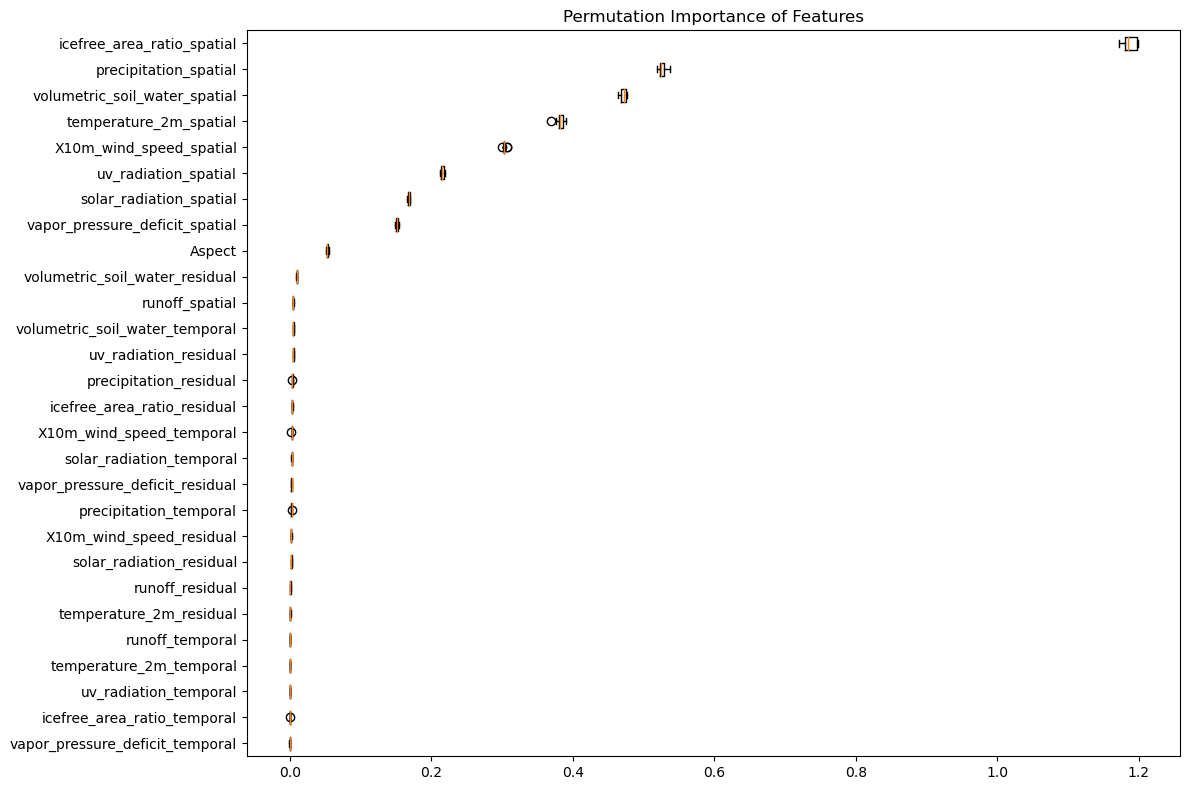

In [8]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

# Organizing the results
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features")
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd

# Creating a DataFrame with feature names and their corresponding importance values
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns[perm_sorted_idx],
    'Importance_Mean': result.importances_mean[perm_sorted_idx],
    'Importance_Std': result.importances_std[perm_sorted_idx]
})

# Save to CSV
perm_importance_df.to_csv("G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\permutation_importance.csv", index=False)

print("Permutation importance results saved as 'permutation_importance.csv'")

Permutation importance results saved as 'permutation_importance.csv'


In [10]:
import pandas as pd
import numpy as np
import os
from sklearn.inspection import partial_dependence

# Define directory to save PDP results
pdp_save_dir = r"G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results"
os.makedirs(pdp_save_dir, exist_ok=True)

# Get all feature names
all_features = X_test.columns.tolist()

# Compute and save PDP results for all features
for feature in all_features:
    print(f"Computing PDP for {feature}...")

    # Compute partial dependence
    pdp_values = partial_dependence(model, X_test, features=[feature])

    # Convert results to a DataFrame
    pdp_df = pd.DataFrame({
        'Feature': [feature] * len(pdp_values['values'][0]),  # Repeat feature name
        'Feature_Value': pdp_values['values'][0],  # Feature values (grid points)
        'Partial_Dependence': pdp_values['average'][0]  # Corresponding PDP values
    })

    # Save to CSV
    file_path = os.path.join(pdp_save_dir, f'Partial_dependence_{feature}.csv')
    pdp_df.to_csv(file_path, index=False)
    print(f"PDP results saved for {feature}: {file_path}")

Computing PDP for Aspect...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for Aspect: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_Aspect.csv
Computing PDP for temperature_2m_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for temperature_2m_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_temperature_2m_spatial.csv
Computing PDP for uv_radiation_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for uv_radiation_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_uv_radiation_spatial.csv
Computing PDP for icefree_area_ratio_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for icefree_area_ratio_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_icefree_area_ratio_spatial.csv
Computing PDP for solar_radiation_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for solar_radiation_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_solar_radiation_spatial.csv
Computing PDP for volumetric_soil_water_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for volumetric_soil_water_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_volumetric_soil_water_spatial.csv
Computing PDP for runoff_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for runoff_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_runoff_spatial.csv
Computing PDP for X10m_wind_speed_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for X10m_wind_speed_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_X10m_wind_speed_spatial.csv
Computing PDP for precipitation_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for precipitation_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_precipitation_spatial.csv
Computing PDP for vapor_pressure_deficit_spatial...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for vapor_pressure_deficit_spatial: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_vapor_pressure_deficit_spatial.csv
Computing PDP for temperature_2m_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for temperature_2m_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_temperature_2m_temporal.csv
Computing PDP for uv_radiation_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for uv_radiation_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_uv_radiation_temporal.csv
Computing PDP for icefree_area_ratio_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for icefree_area_ratio_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_icefree_area_ratio_temporal.csv
Computing PDP for solar_radiation_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for solar_radiation_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_solar_radiation_temporal.csv
Computing PDP for volumetric_soil_water_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for volumetric_soil_water_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_volumetric_soil_water_temporal.csv
Computing PDP for runoff_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for runoff_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_runoff_temporal.csv
Computing PDP for X10m_wind_speed_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for X10m_wind_speed_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_X10m_wind_speed_temporal.csv
Computing PDP for precipitation_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for precipitation_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_precipitation_temporal.csv
Computing PDP for vapor_pressure_deficit_temporal...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for vapor_pressure_deficit_temporal: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_vapor_pressure_deficit_temporal.csv
Computing PDP for temperature_2m_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for temperature_2m_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_temperature_2m_residual.csv
Computing PDP for uv_radiation_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for uv_radiation_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_uv_radiation_residual.csv
Computing PDP for icefree_area_ratio_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for icefree_area_ratio_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_icefree_area_ratio_residual.csv
Computing PDP for solar_radiation_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for solar_radiation_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_solar_radiation_residual.csv
Computing PDP for volumetric_soil_water_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for volumetric_soil_water_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_volumetric_soil_water_residual.csv
Computing PDP for runoff_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for runoff_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_runoff_residual.csv
Computing PDP for X10m_wind_speed_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for X10m_wind_speed_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_X10m_wind_speed_residual.csv
Computing PDP for precipitation_residual...


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


PDP results saved for precipitation_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_precipitation_residual.csv
Computing PDP for vapor_pressure_deficit_residual...
PDP results saved for vapor_pressure_deficit_residual: G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\pdp_whole_continent_results\Partial_dependence_vapor_pressure_deficit_residual.csv


C:\Users\hyou34\AppData\Local\miniconda3\envs\py38\lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the full dataset
df_full = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv')

# Assuming 'vegetation_area_ratio' is the target variable
features = df_full.drop(['land_area','Num','vegetation_area_ratio', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude'], axis=1)
target = df_full['vegetation_area_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [4]:
# Print columns used for training to ensure consistency
print("Columns used for training:", X_train.columns)

Columns used for training: Index(['Aspect', 'temperature_2m_spatial', 'uv_radiation_spatial',
       'icefree_area_ratio_spatial', 'solar_radiation_spatial',
       'volumetric_soil_water_spatial', 'runoff_spatial',
       'X10m_wind_speed_spatial', 'precipitation_spatial',
       'vapor_pressure_deficit_spatial', 'temperature_2m_temporal',
       'uv_radiation_temporal', 'icefree_area_ratio_temporal',
       'solar_radiation_temporal', 'volumetric_soil_water_temporal',
       'runoff_temporal', 'X10m_wind_speed_temporal', 'precipitation_temporal',
       'vapor_pressure_deficit_temporal', 'temperature_2m_residual',
       'uv_radiation_residual', 'icefree_area_ratio_residual',
       'solar_radiation_residual', 'volumetric_soil_water_residual',
       'runoff_residual', 'X10m_wind_speed_residual', 'precipitation_residual',
       'vapor_pressure_deficit_residual'],
      dtype='object')


In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

# Load the dataset
df_full = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv')

# Ensure correct dataframe variable is used
if 'land_area' not in df_full.columns:
    print("Dataframe does not contain 'land_area' column.")
    exit()

# Function to detrend data for specific components of a variable
def detrend_data(df, variable_components):
    model = LinearRegression()
    trends = {}
    residuals = df.copy()
    
    for pixel in tqdm(df['pixel'].unique(), desc="Detrending data"):
        pixel_data = df[df['pixel'] == pixel]
        years = pixel_data['year'].values.reshape(-1, 1)
        
        for component in variable_components:
            values = pixel_data[component].values.reshape(-1, 1)
            if values.shape[0] > 1:  # Ensure there are enough data points to fit a model
                model.fit(years, values)
                trend = model.predict(years)
                
                first_year_value = trend[0]
                residuals.loc[pixel_data.index, component] = values.flatten() - trend.flatten() + first_year_value
                
                trends[pixel] = trends.get(pixel, {})
                trends[pixel][component] = model.coef_[0]
            else:
                residuals.loc[pixel_data.index, component] = values.flatten()

    return residuals

# List of base variables to be detrended together
base_variables = ['temperature_2m', 'solar_radiation', 'uv_radiation', 'volumetric_soil_water', 'runoff', 'X10m_wind_speed', 'precipitation', 'vapor_pressure_deficit']
results = pd.DataFrame(index=df_full['year'].unique(), columns=base_variables)

# Perform detrending on temporal and residual components
for base_var in base_variables:
    temporal_component = f"{base_var}_temporal"
    residual_component = f"{base_var}_residual"
    if temporal_component in df_full.columns and residual_component in df_full.columns:
        detrended_df = detrend_data(df_full, [temporal_component, residual_component])
        # Save the detrended data to CSV
        detrended_df.to_csv(f'G:\\Hangkai\\Anttarctic Vegetation Dynamic\\RF_trainning_data\\cleared_data\\detrended_{base_var}.csv', index=False)
        print(f"Detrended {base_var} for both temporal and residual components.")

        # Verify and match feature names for prediction
        predictors = [col for col in rf_model.feature_names_in_ if col in detrended_df.columns]
        X = detrended_df[predictors]
        detrended_df['predicted_ratio'] = rf_model.predict(X) 
        
        # Calculate predicted vegetated area
        detrended_df['predicted_area'] = detrended_df['land_area'] * detrended_df['predicted_ratio']
        yearly_area = detrended_df.groupby('year')['predicted_area'].sum()
        
        results[base_var] = yearly_area

print(results)

Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:35<00:00, 186.91it/s]


Detrended temperature_2m for both temporal and residual components.


Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:42<00:00, 181.00it/s]


Detrended solar_radiation for both temporal and residual components.


Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:49<00:00, 175.85it/s]


Detrended uv_radiation for both temporal and residual components.


Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:41<00:00, 181.93it/s]


Detrended volumetric_soil_water for both temporal and residual components.


Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:43<00:00, 179.92it/s]


Detrended runoff for both temporal and residual components.


Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:45<00:00, 178.64it/s]


Detrended X10m_wind_speed for both temporal and residual components.


Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:45<00:00, 178.54it/s]


Detrended precipitation for both temporal and residual components.


Detrending data: 100%|██████████████████████████████████| 40298/40298 [03:54<00:00, 172.18it/s]


Detrended vapor_pressure_deficit for both temporal and residual components.
      temperature_2m  solar_radiation  uv_radiation  volumetric_soil_water  \
2002     6750.755111      6750.755111   6750.755111            6750.755111   
2003     7382.874898      7457.026589   7385.703272            7450.279631   
2004     7503.241993      7524.083811   7566.215811            7637.039256   
2005     7517.106339      7472.768252   7491.864614            7580.985709   
2006     7703.715182      7644.277532   7727.351038            7768.828400   
2007     7633.712036      7636.144123   7581.923452            7724.252219   
2008     8329.027263      8262.198253   8629.907644            8211.966506   
2009     8025.514616      8097.758999   8104.101318            8294.570918   
2010     8270.351184      8339.336119   8597.136681            8620.453886   
2011     8218.709950      8186.922235   8253.246245            8566.633087   
2012     8818.458732      8997.935509   8951.932246            919

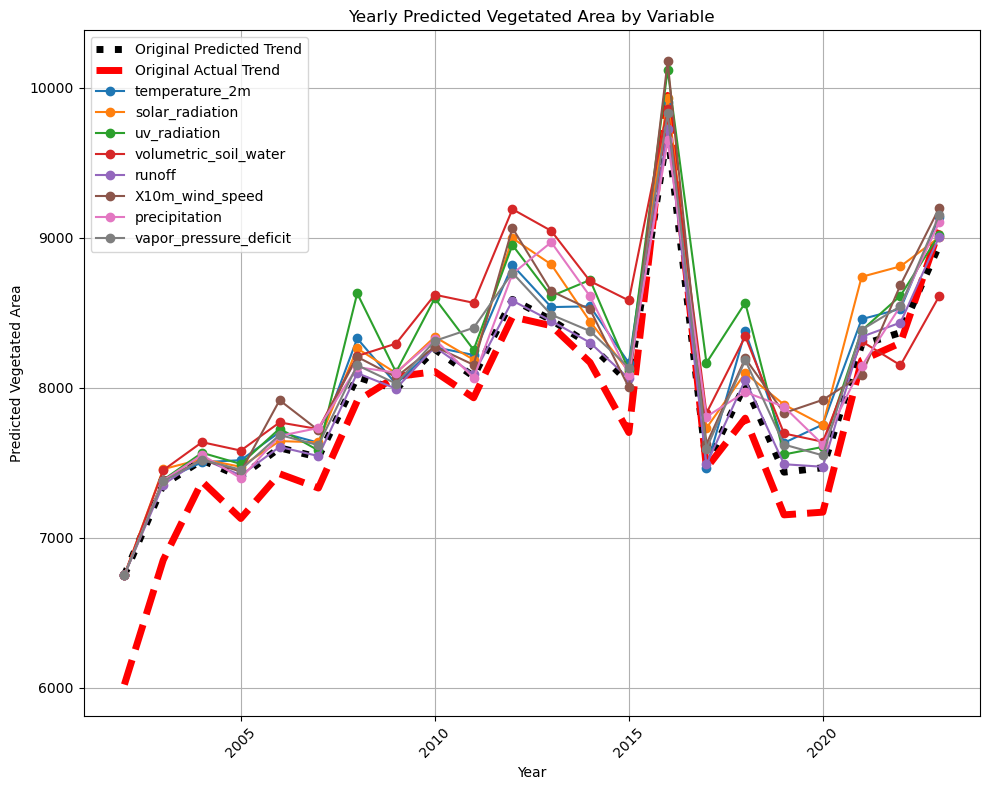

In [23]:
import matplotlib.pyplot as plt

# Original data prediction
X_original = df_full[predictors]  # Use predictors directly here
df_full['original_predicted_ratio'] = rf_model.predict(X_original)
df_full['original_predicted_area'] = df_full['land_area'] * df_full['original_predicted_ratio']
df_full['Total_area'] = df_full['land_area'] *df_full['vegetation_area_ratio']
original_yearly_predicted_area = df_full.groupby('year')['original_predicted_area'].sum()
original_yearly_actual_area = df_full.groupby('year')['Total_area'].sum()

fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(original_yearly_predicted_area.index, original_yearly_predicted_area, label='Original Predicted Trend', color='black', linewidth=5,linestyle = ':')
plt.plot(original_yearly_actual_area.index, original_yearly_actual_area, label='Original Actual Trend', color='red', linewidth=5, linestyle = '--')

# Plot each variable
for column in results.columns:
    ax.plot(results.index, results[column], label=column, marker='o')

ax.set_title('Yearly Predicted Vegetated Area by Variable')
ax.set_xlabel('Year')
ax.set_ylabel('Predicted Vegetated Area')
ax.legend()

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add a grid for easier visualization of data points
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.legend()

plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pymannkendall as mk
from tqdm import tqdm
import itertools

df_original = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv')

base_variables = ['temperature_2m', 'solar_radiation', 'uv_radiation', 'volumetric_soil_water', 'runoff', 'X10m_wind_speed', 'precipitation', 'vapor_pressure_deficit']

all_combinations = list(itertools.chain(*[itertools.combinations(base_variables, r) for r in range(1, len(base_variables) + 1)]))
print(all_combinations)
yearly_areas = []

for combination in tqdm(all_combinations):
    df_full = df_original.copy()

    for var in combination:
        path = f'G:\\Hangkai\\Anttarctic Vegetation Dynamic\\RF_trainning_data\\cleared_data\\detrended_{var}.csv'
        detrended_data = pd.read_csv(path)

        for component in ['temporal', 'residual']:
            col_name = f"{var}_{component}"
            if col_name in detrended_data.columns:
                df_full[col_name] = detrended_data[col_name]

    predictors = [col for col in rf_model.feature_names_in_ if col in df_full.columns]
    X = df_full[predictors]
    df_full['predicted_ratio'] = rf_model.predict(X)
    df_full['predicted_area'] = df_full['land_area'] * df_full['predicted_ratio']
    yearly_area = df_full.groupby('year')['predicted_area'].sum().reset_index(name='total_predicted_area')

    yearly_area['variables'] = ', '.join(combination)
    yearly_areas.append(yearly_area)

yearly_area_results = pd.concat(yearly_areas, ignore_index=True)

[('temperature_2m',), ('solar_radiation',), ('uv_radiation',), ('volumetric_soil_water',), ('runoff',), ('X10m_wind_speed',), ('precipitation',), ('vapor_pressure_deficit',), ('temperature_2m', 'solar_radiation'), ('temperature_2m', 'uv_radiation'), ('temperature_2m', 'volumetric_soil_water'), ('temperature_2m', 'runoff'), ('temperature_2m', 'X10m_wind_speed'), ('temperature_2m', 'precipitation'), ('temperature_2m', 'vapor_pressure_deficit'), ('solar_radiation', 'uv_radiation'), ('solar_radiation', 'volumetric_soil_water'), ('solar_radiation', 'runoff'), ('solar_radiation', 'X10m_wind_speed'), ('solar_radiation', 'precipitation'), ('solar_radiation', 'vapor_pressure_deficit'), ('uv_radiation', 'volumetric_soil_water'), ('uv_radiation', 'runoff'), ('uv_radiation', 'X10m_wind_speed'), ('uv_radiation', 'precipitation'), ('uv_radiation', 'vapor_pressure_deficit'), ('volumetric_soil_water', 'runoff'), ('volumetric_soil_water', 'X10m_wind_speed'), ('volumetric_soil_water', 'precipitation'), 

100%|██████████████████████████████████████████████████████| 255/255 [2:43:04<00:00, 38.37s/it]


In [44]:
file_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\yearly_area_results.csv'
yearly_area_results.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")


Data saved successfully to G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\yearly_area_results.csv


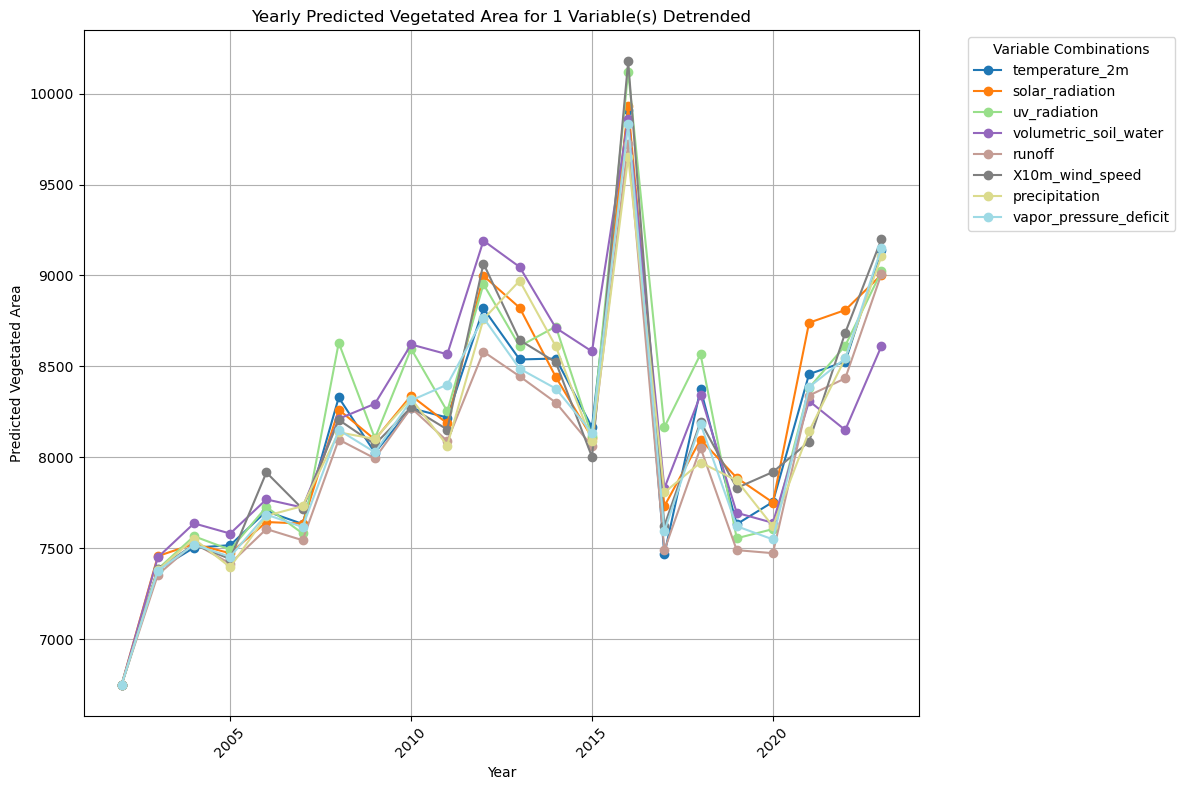

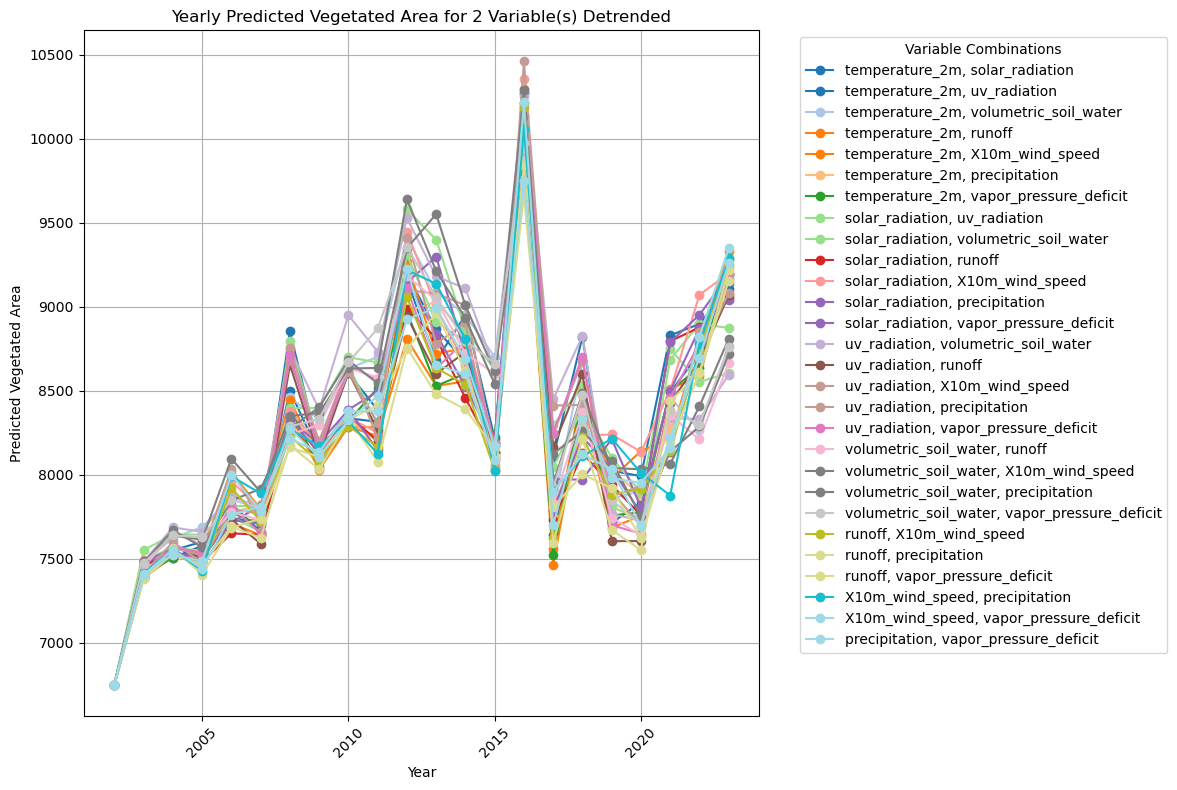

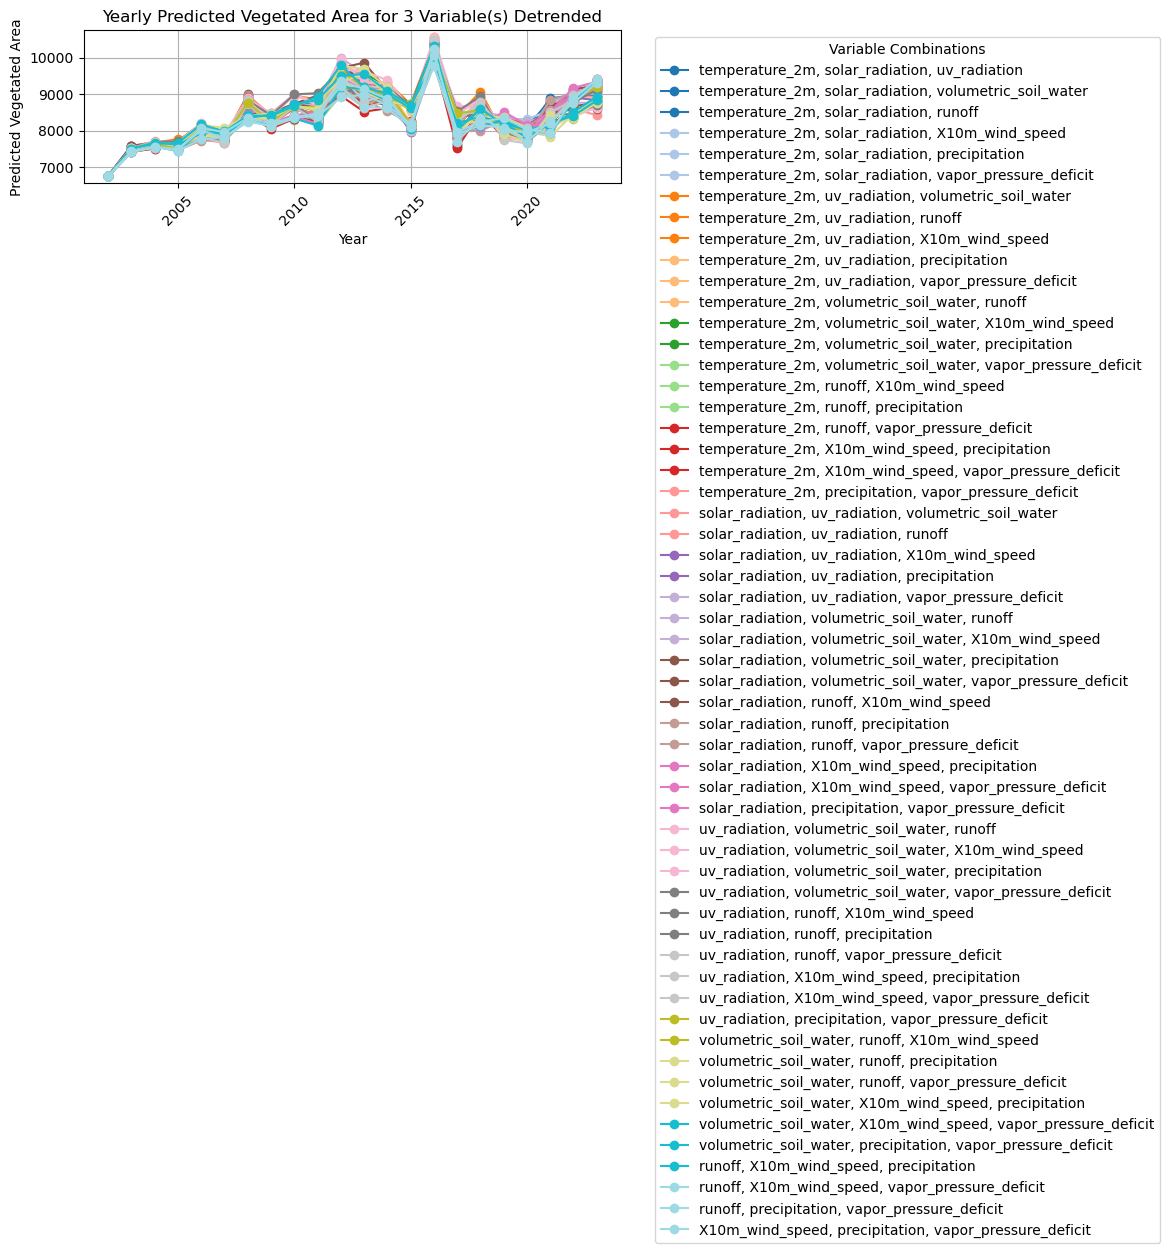

C:\Users\hyou34\AppData\Local\Temp\ipykernel_92720\1282707625.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


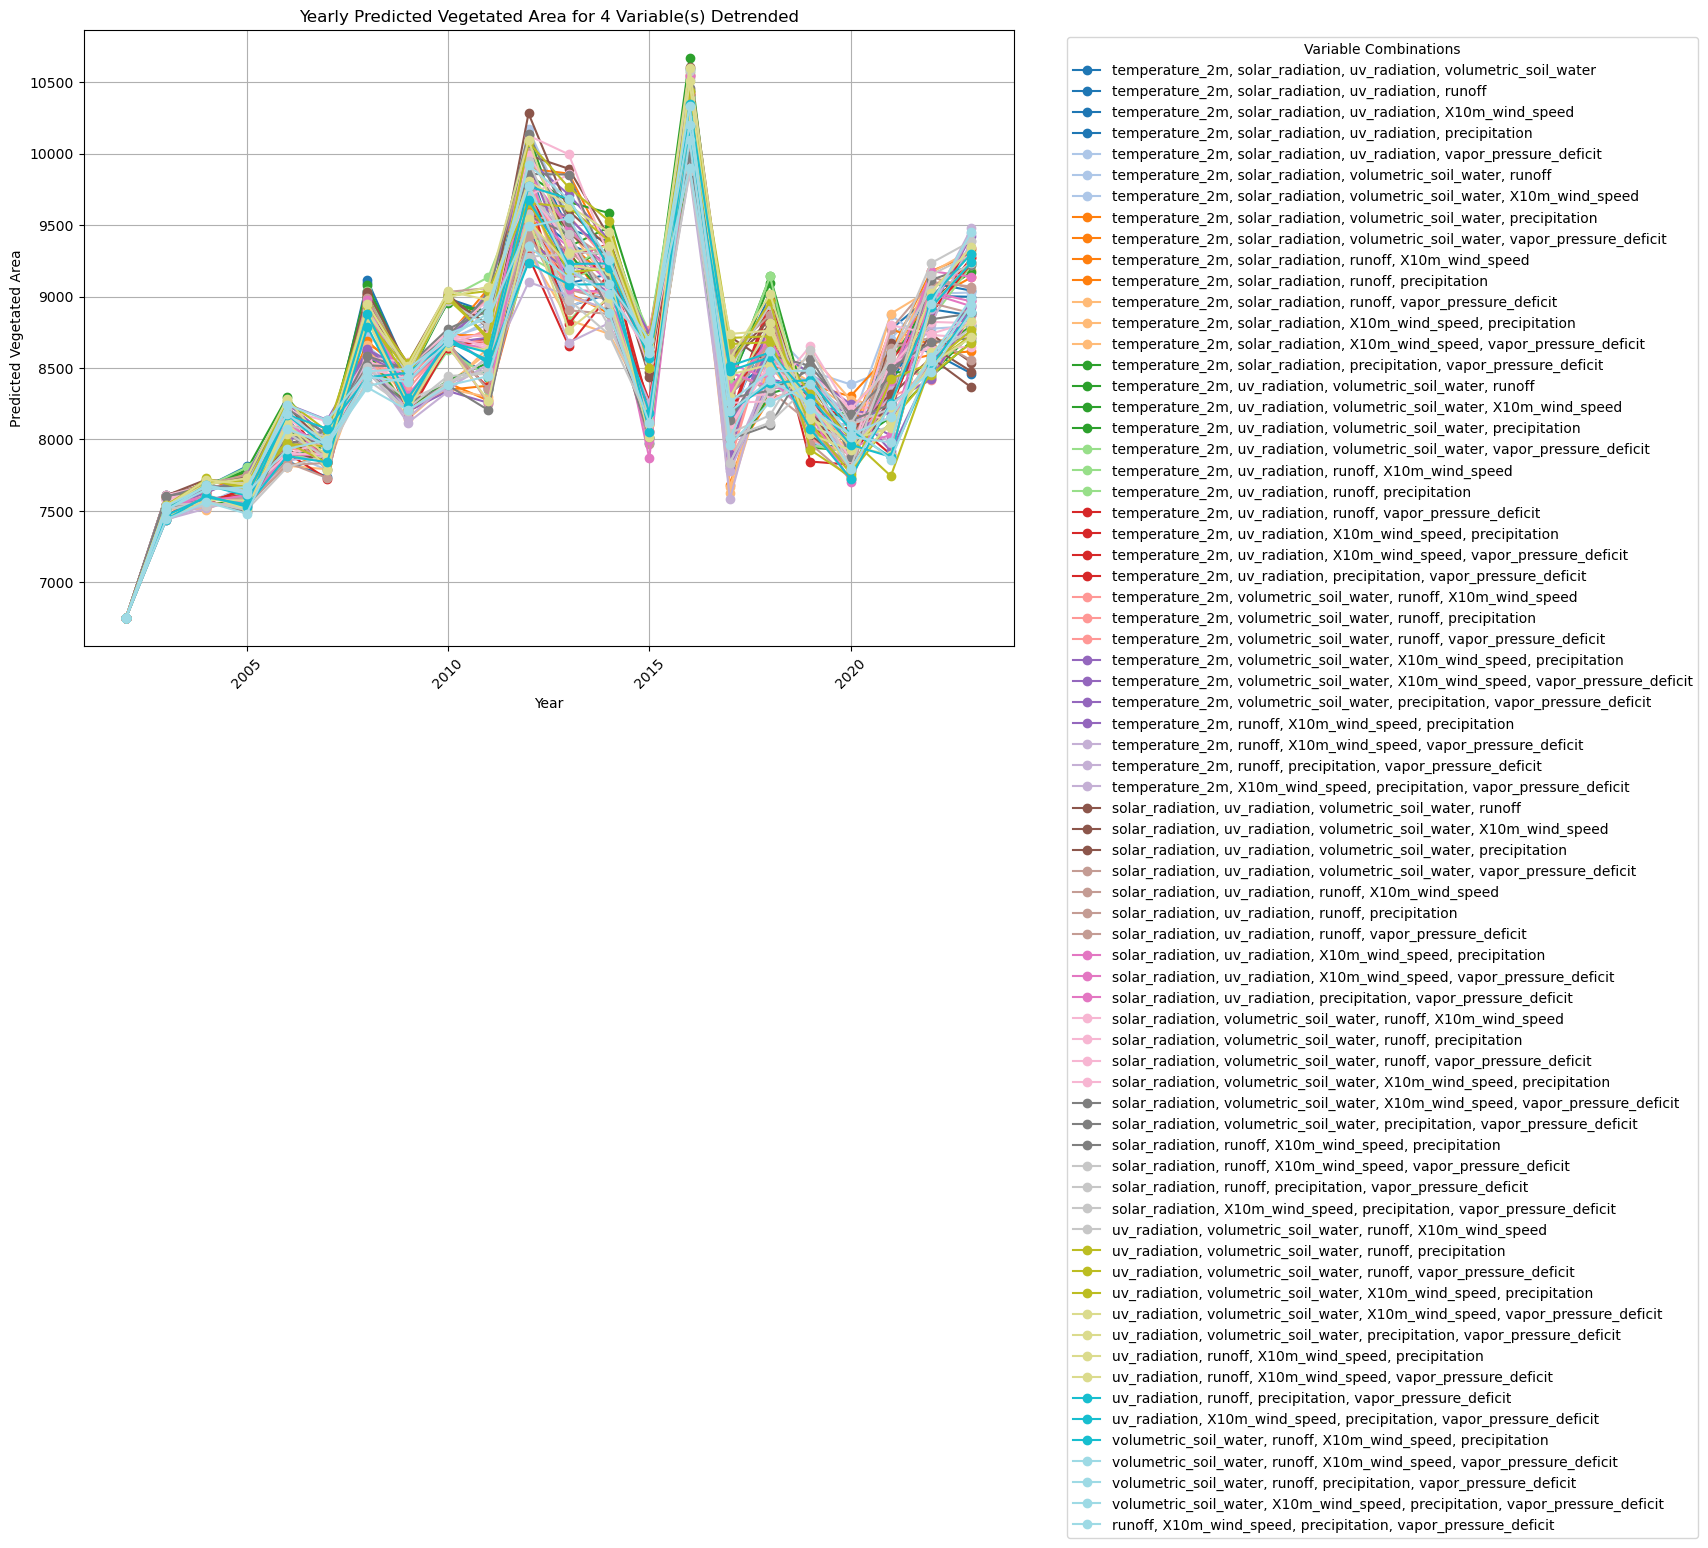

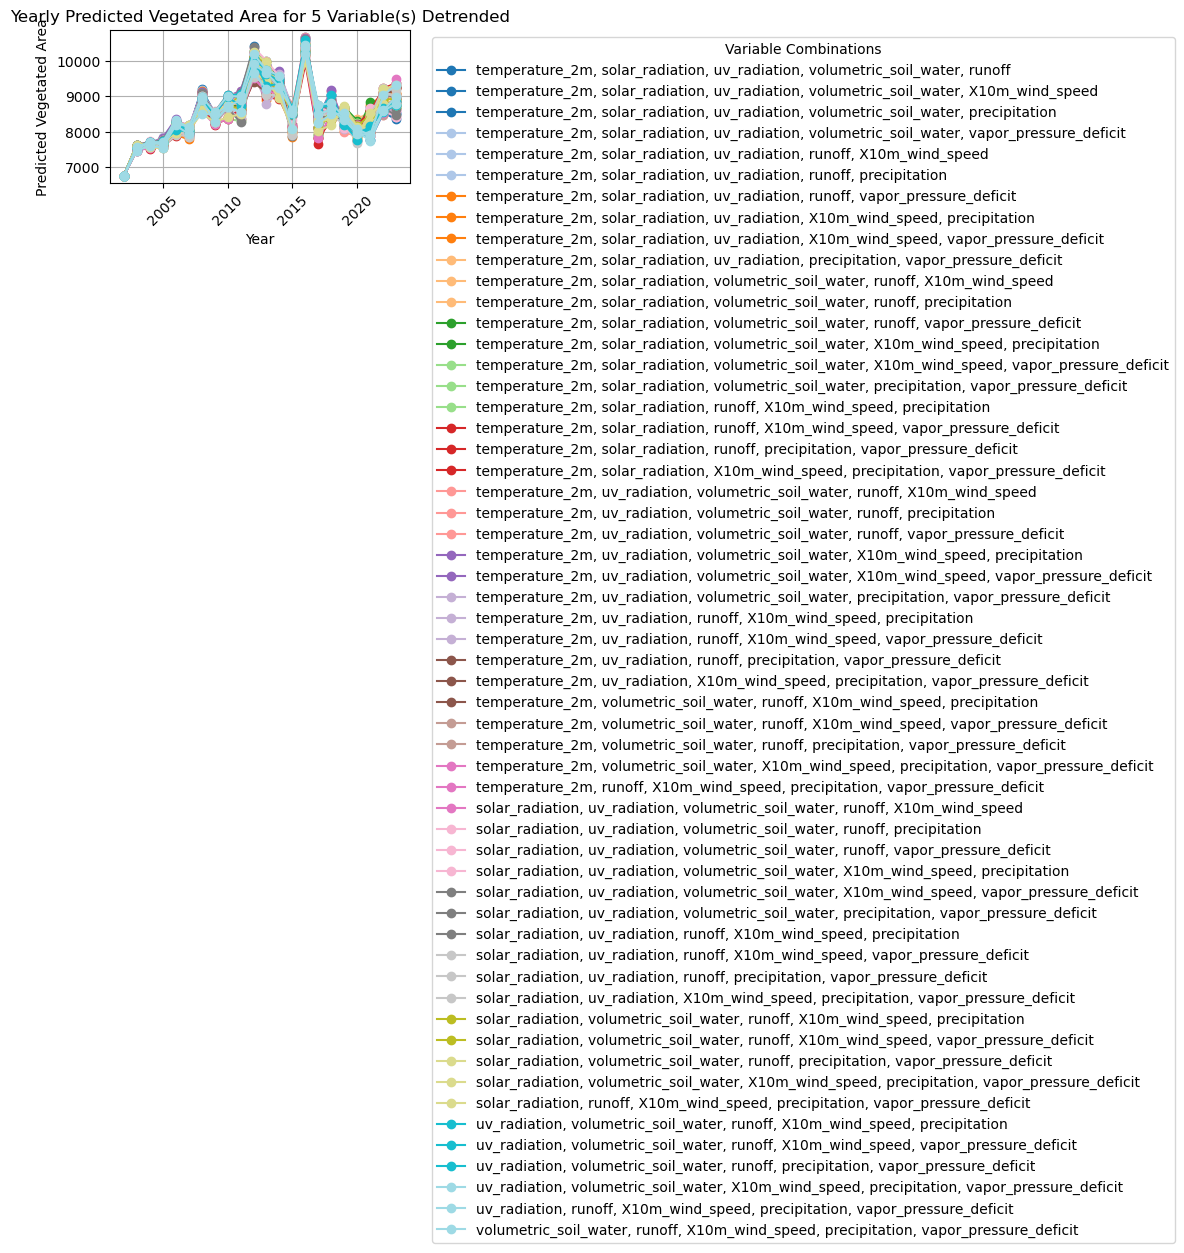

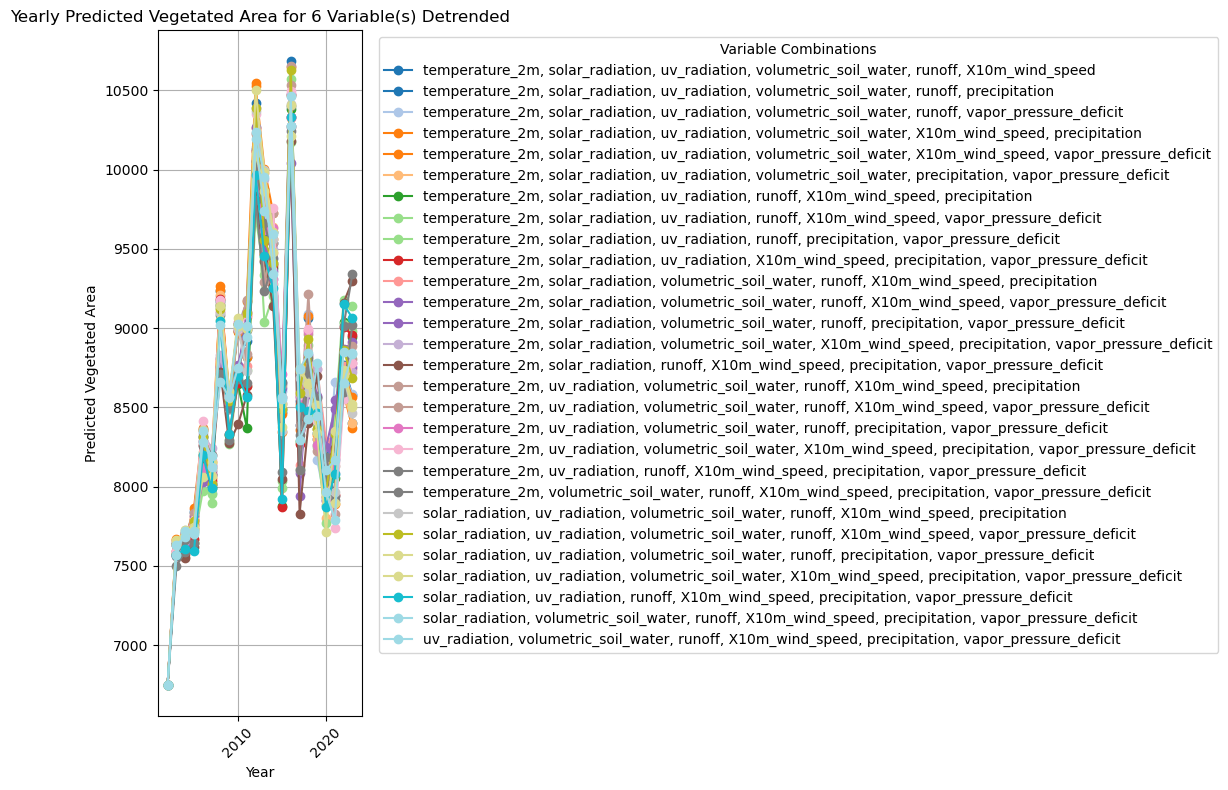

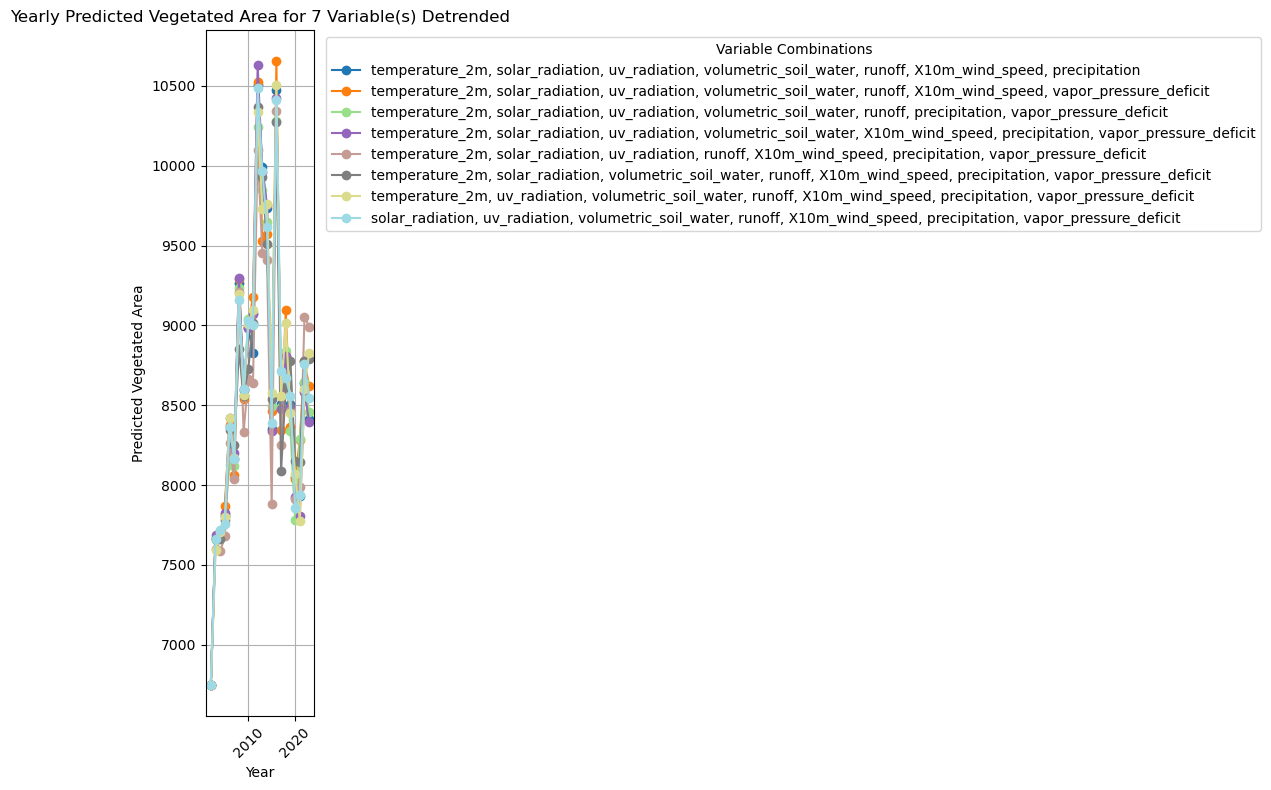

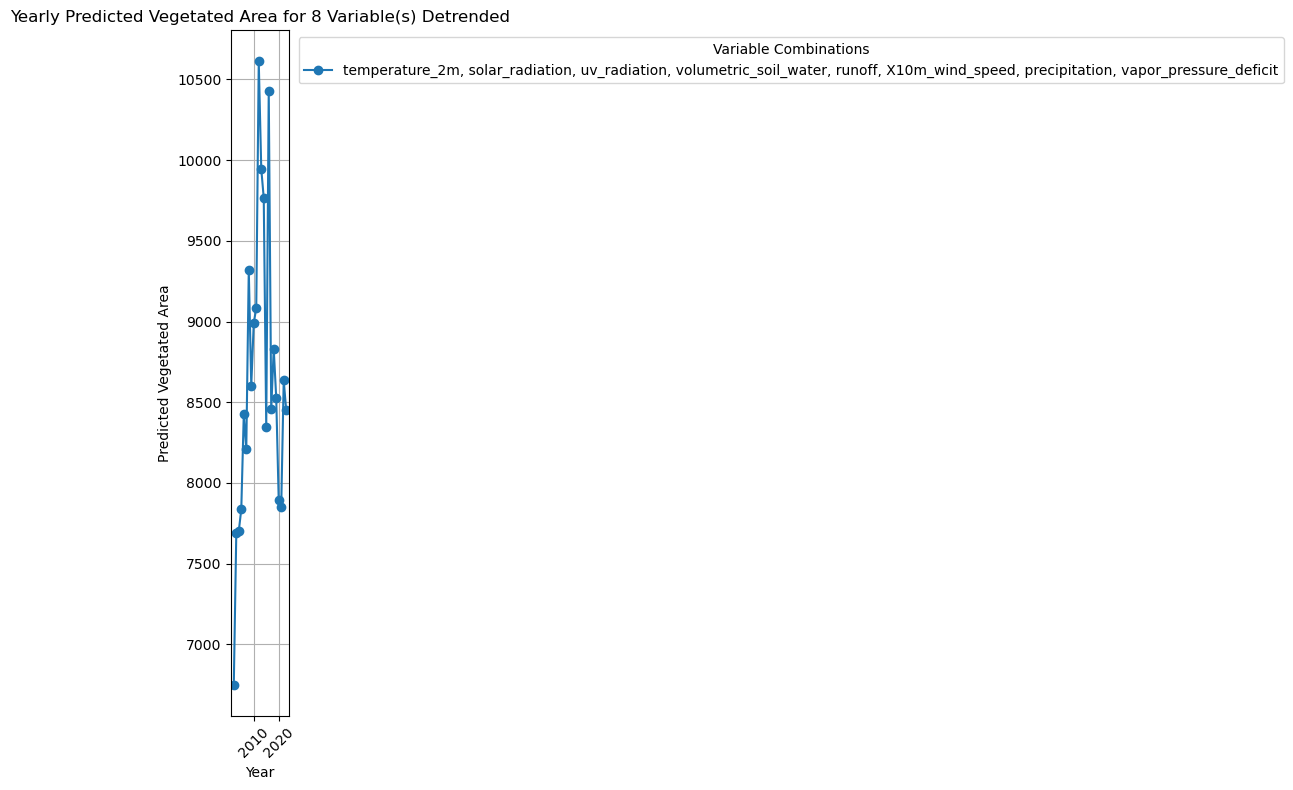

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 从数据中获取所有可能的变量组合数量
num_combinations = yearly_area_results['num_variables'].unique()

# 为每种变量组合数量创建一个图
for num in sorted(num_combinations):
    fig, ax = plt.subplots(figsize=(12, 8))
    # 提取当前组合数量的数据
    subset = yearly_area_results[yearly_area_results['num_variables'] == num]
    # 获取这一组合数量下的所有独特变量组合
    unique_variables = subset['variables'].unique()
    # 为每个独特组合分配颜色
    color_map = plt.get_cmap('tab20')  # 选择有足够颜色选项的颜色图
    colors = color_map(np.linspace(0, 1, len(unique_variables)))
    color_dict = dict(zip(unique_variables, colors))
    
    # 绘制每个组合的趋势
    for variable in unique_variables:
        combo_subset = subset[subset['variables'] == variable]
        ax.plot(combo_subset['year'], combo_subset['total_predicted_area'], label=variable, color=color_dict[variable], marker='o')
    
    # 设置图表的标题、标签和图例
    ax.set_title(f'Yearly Predicted Vegetated Area for {num} Variable(s) Detrended')
    ax.set_xlabel('Year')
    ax.set_ylabel('Predicted Vegetated Area')
    ax.legend(title='Variable Combinations', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# 计算原始数据的 RMSE
rmse_original = sqrt(mean_squared_error(original_yearly_actual_area, original_yearly_predicted_area))

print(f"Original RMSE: {rmse_original}")

Original RMSE: 259.0445227120026


In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import pymannkendall as mk

# 计算 RMSE 和趋势差异
results_analysis = []

for variables, group in yearly_area_results.groupby('variables'):
    # 计算 RMSE
    predicted_area = group.set_index('year')['total_predicted_area']
    rmse = np.sqrt(mean_squared_error(original_yearly_actual_area, predicted_area.reindex(original_yearly_actual_area.index)))
    
    # 进行 Mann-Kendall 趋势测试
    mk_result = mk.original_test(predicted_area)
    
    # 计算去趋势前后的预测面积的斜率差异
    # 使用 NumPy 的 polyfit 来获得一次多项式拟合的斜率（即趋势线的斜率）
    slope_original, _ = np.polyfit(original_yearly_predicted_area.index, original_yearly_predicted_area, 1)
    slope_detrended, _ = np.polyfit(predicted_area.index, predicted_area, 1)
    slope_difference = abs(slope_original - slope_detrended)
    
    # 汇总结果
    results_analysis.append({
        'variables': variables,
        'RMSE': rmse,
        'Trend Slope Difference': slope_difference,
        'Trend p-value': mk_result.p,
        'Trend is Significant': mk_result.p < 0.05
    })

# 转换结果列表为 DataFrame 并排序
evaluation_results = pd.DataFrame(results_analysis)
print(evaluation_results.sort_values(by='RMSE'))

                                             variables         RMSE  \
6                                               runoff   268.925665   
238                             vapor_pressure_deficit   329.195451   
13                      runoff, vapor_pressure_deficit   343.949277   
78                                      temperature_2m   367.568622   
4                                        precipitation   370.493381   
..                                                 ...          ...   
183  temperature_2m, uv_radiation, volumetric_soil_...   993.307465   
126  temperature_2m, solar_radiation, uv_radiation,...  1000.212708   
133  temperature_2m, solar_radiation, uv_radiation,...  1002.089159   
127  temperature_2m, solar_radiation, uv_radiation,...  1024.461306   
134  temperature_2m, solar_radiation, uv_radiation,...  1025.947016   

     Trend Slope Difference  Trend p-value  Trend is Significant  
6                  2.196396       0.009481                  True  
238          

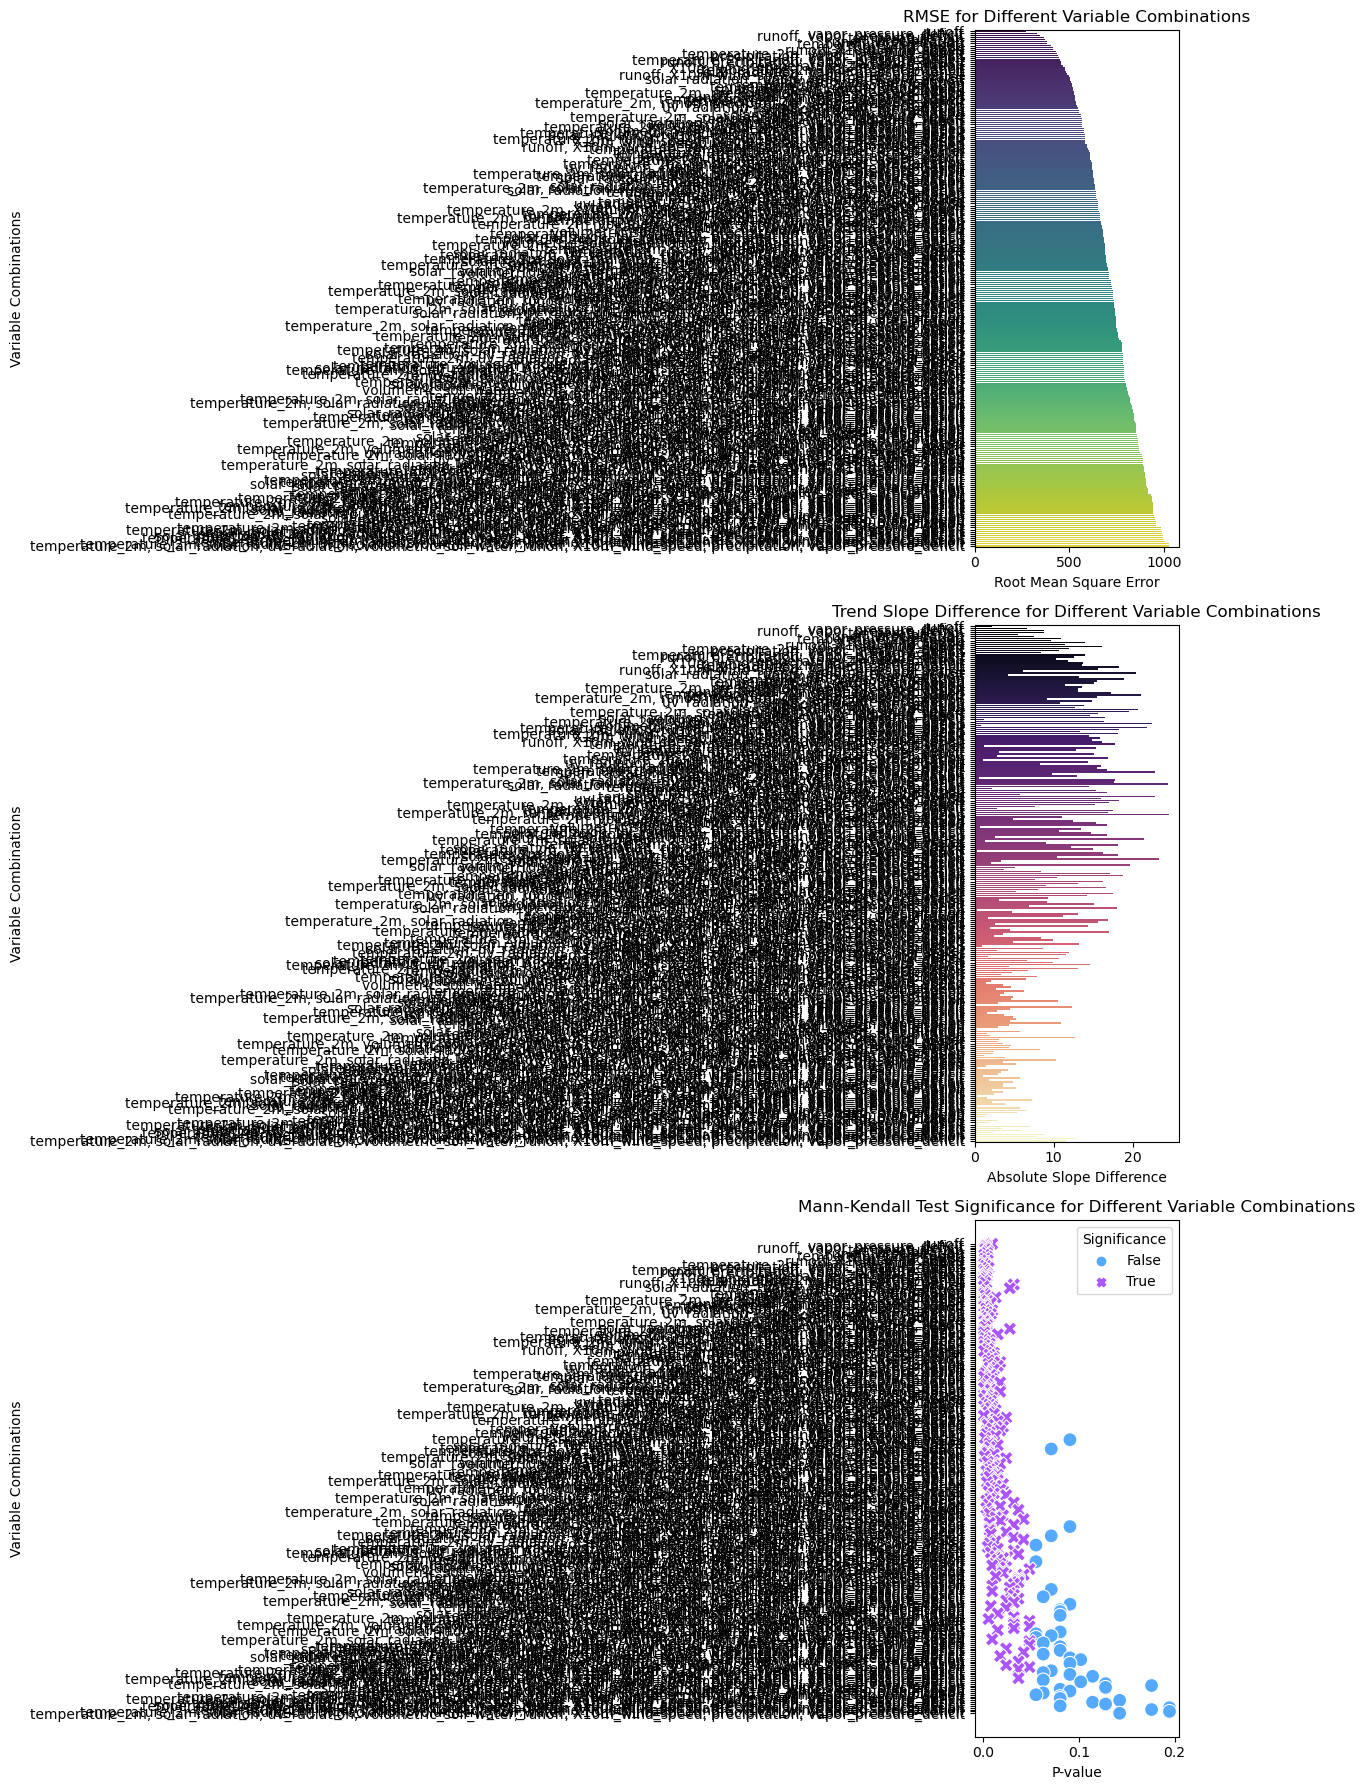

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 evaluation_results 是之前步骤中计算得到的 DataFrame
# 按照 RMSE 排序，便于可视化比较
evaluation_results = evaluation_results.sort_values(by='RMSE')

# 设置画布和子图布局
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# 可视化 RMSE
sns.barplot(x='RMSE', y='variables', data=evaluation_results, ax=axes[0], palette='viridis')
axes[0].set_title('RMSE for Different Variable Combinations')
axes[0].set_xlabel('Root Mean Square Error')
axes[0].set_ylabel('Variable Combinations')

# 可视化趋势斜率差异
sns.barplot(x='Trend Slope Difference', y='variables', data=evaluation_results, ax=axes[1], palette='magma')
axes[1].set_title('Trend Slope Difference for Different Variable Combinations')
axes[1].set_xlabel('Absolute Slope Difference')
axes[1].set_ylabel('Variable Combinations')

# 可视化 Mann-Kendall 测试的显著性
sns.scatterplot(x='Trend p-value', y='variables', data=evaluation_results, ax=axes[2], hue='Trend is Significant', style='Trend is Significant', palette='cool', s=100)
axes[2].set_title('Mann-Kendall Test Significance for Different Variable Combinations')
axes[2].set_xlabel('P-value')
axes[2].set_ylabel('Variable Combinations')
axes[2].legend(title='Significance', loc='upper right')

# 优化布局和显示
plt.tight_layout()
plt.show()

In [53]:
file_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\evaluation_results.csv'
evaluation_results.to_csv(file_path, index=False)

In [62]:
file_path = r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\evaluation_results.csv'
evaluation_results = pd.read_csv(file_path)

evaluation_results['split_variables'] = evaluation_results['variables'].str.split(', ')

all_variables = set(evaluation_results['split_variables'].explode())

# 统计去趋势后使得趋势显著性为 False 的变量
non_significant_combos = evaluation_results[evaluation_results['Trend is Significant'] == False]

# 统计这些组合中每个变量的贡献
variables_non_significant = []

for variable in all_variables:
    subset = non_significant_combos[non_significant_combos['split_variables'].apply(lambda x: variable in x)]
    count = len(subset)
    variables_non_significant.append({'Variable': variable, 'Count_Non_Significant': count})

# 转换为 DataFrame
non_significant_analysis = pd.DataFrame(variables_non_significant)
non_significant_analysis = non_significant_analysis.sort_values(by='Count_Non_Significant', ascending=False)

# 输出主导趋势变化的变量
print(non_significant_analysis)

# 分析对 RMSE 和趋势斜率差异影响最大的变量
magnitude_analysis = []

for variable in all_variables:
    subset = evaluation_results[evaluation_results['split_variables'].apply(lambda x: variable in x)]
    
    # 计算 RMSE 和趋势斜率差异的平均值
    avg_rmse = subset['RMSE'].mean()
    avg_slope_diff = subset['Trend Slope Difference'].mean()
    
    magnitude_analysis.append({'Variable': variable, 'Avg_RMSE': avg_rmse, 'Avg_Slope_Diff': avg_slope_diff})

# 转换为 DataFrame
magnitude_impact = pd.DataFrame(magnitude_analysis)
magnitude_impact = magnitude_impact.sort_values(by='Avg_RMSE', ascending=False)

# 输出对预测幅度影响最大的变量
print(magnitude_impact)

                 Variable  Count_Non_Significant
5   volumetric_soil_water                     46
7            uv_radiation                     45
6           precipitation                     33
1         solar_radiation                     26
4         X10m_wind_speed                     26
2          temperature_2m                     23
3                  runoff                     22
0  vapor_pressure_deficit                     21
                 Variable    Avg_RMSE  Avg_Slope_Diff
5   volumetric_soil_water  823.385293        4.222251
7            uv_radiation  781.504931        8.159220
4         X10m_wind_speed  772.871593        9.962309
1         solar_radiation  762.211390       10.624783
6           precipitation  751.547375        8.224823
2          temperature_2m  751.427240        9.792452
0  vapor_pressure_deficit  740.712166        9.626244
3                  runoff  719.167451        9.844822


# sensitivity test for my rf model

0it [00:00, ?it/s]


NameError: name 'df_full' is not defined

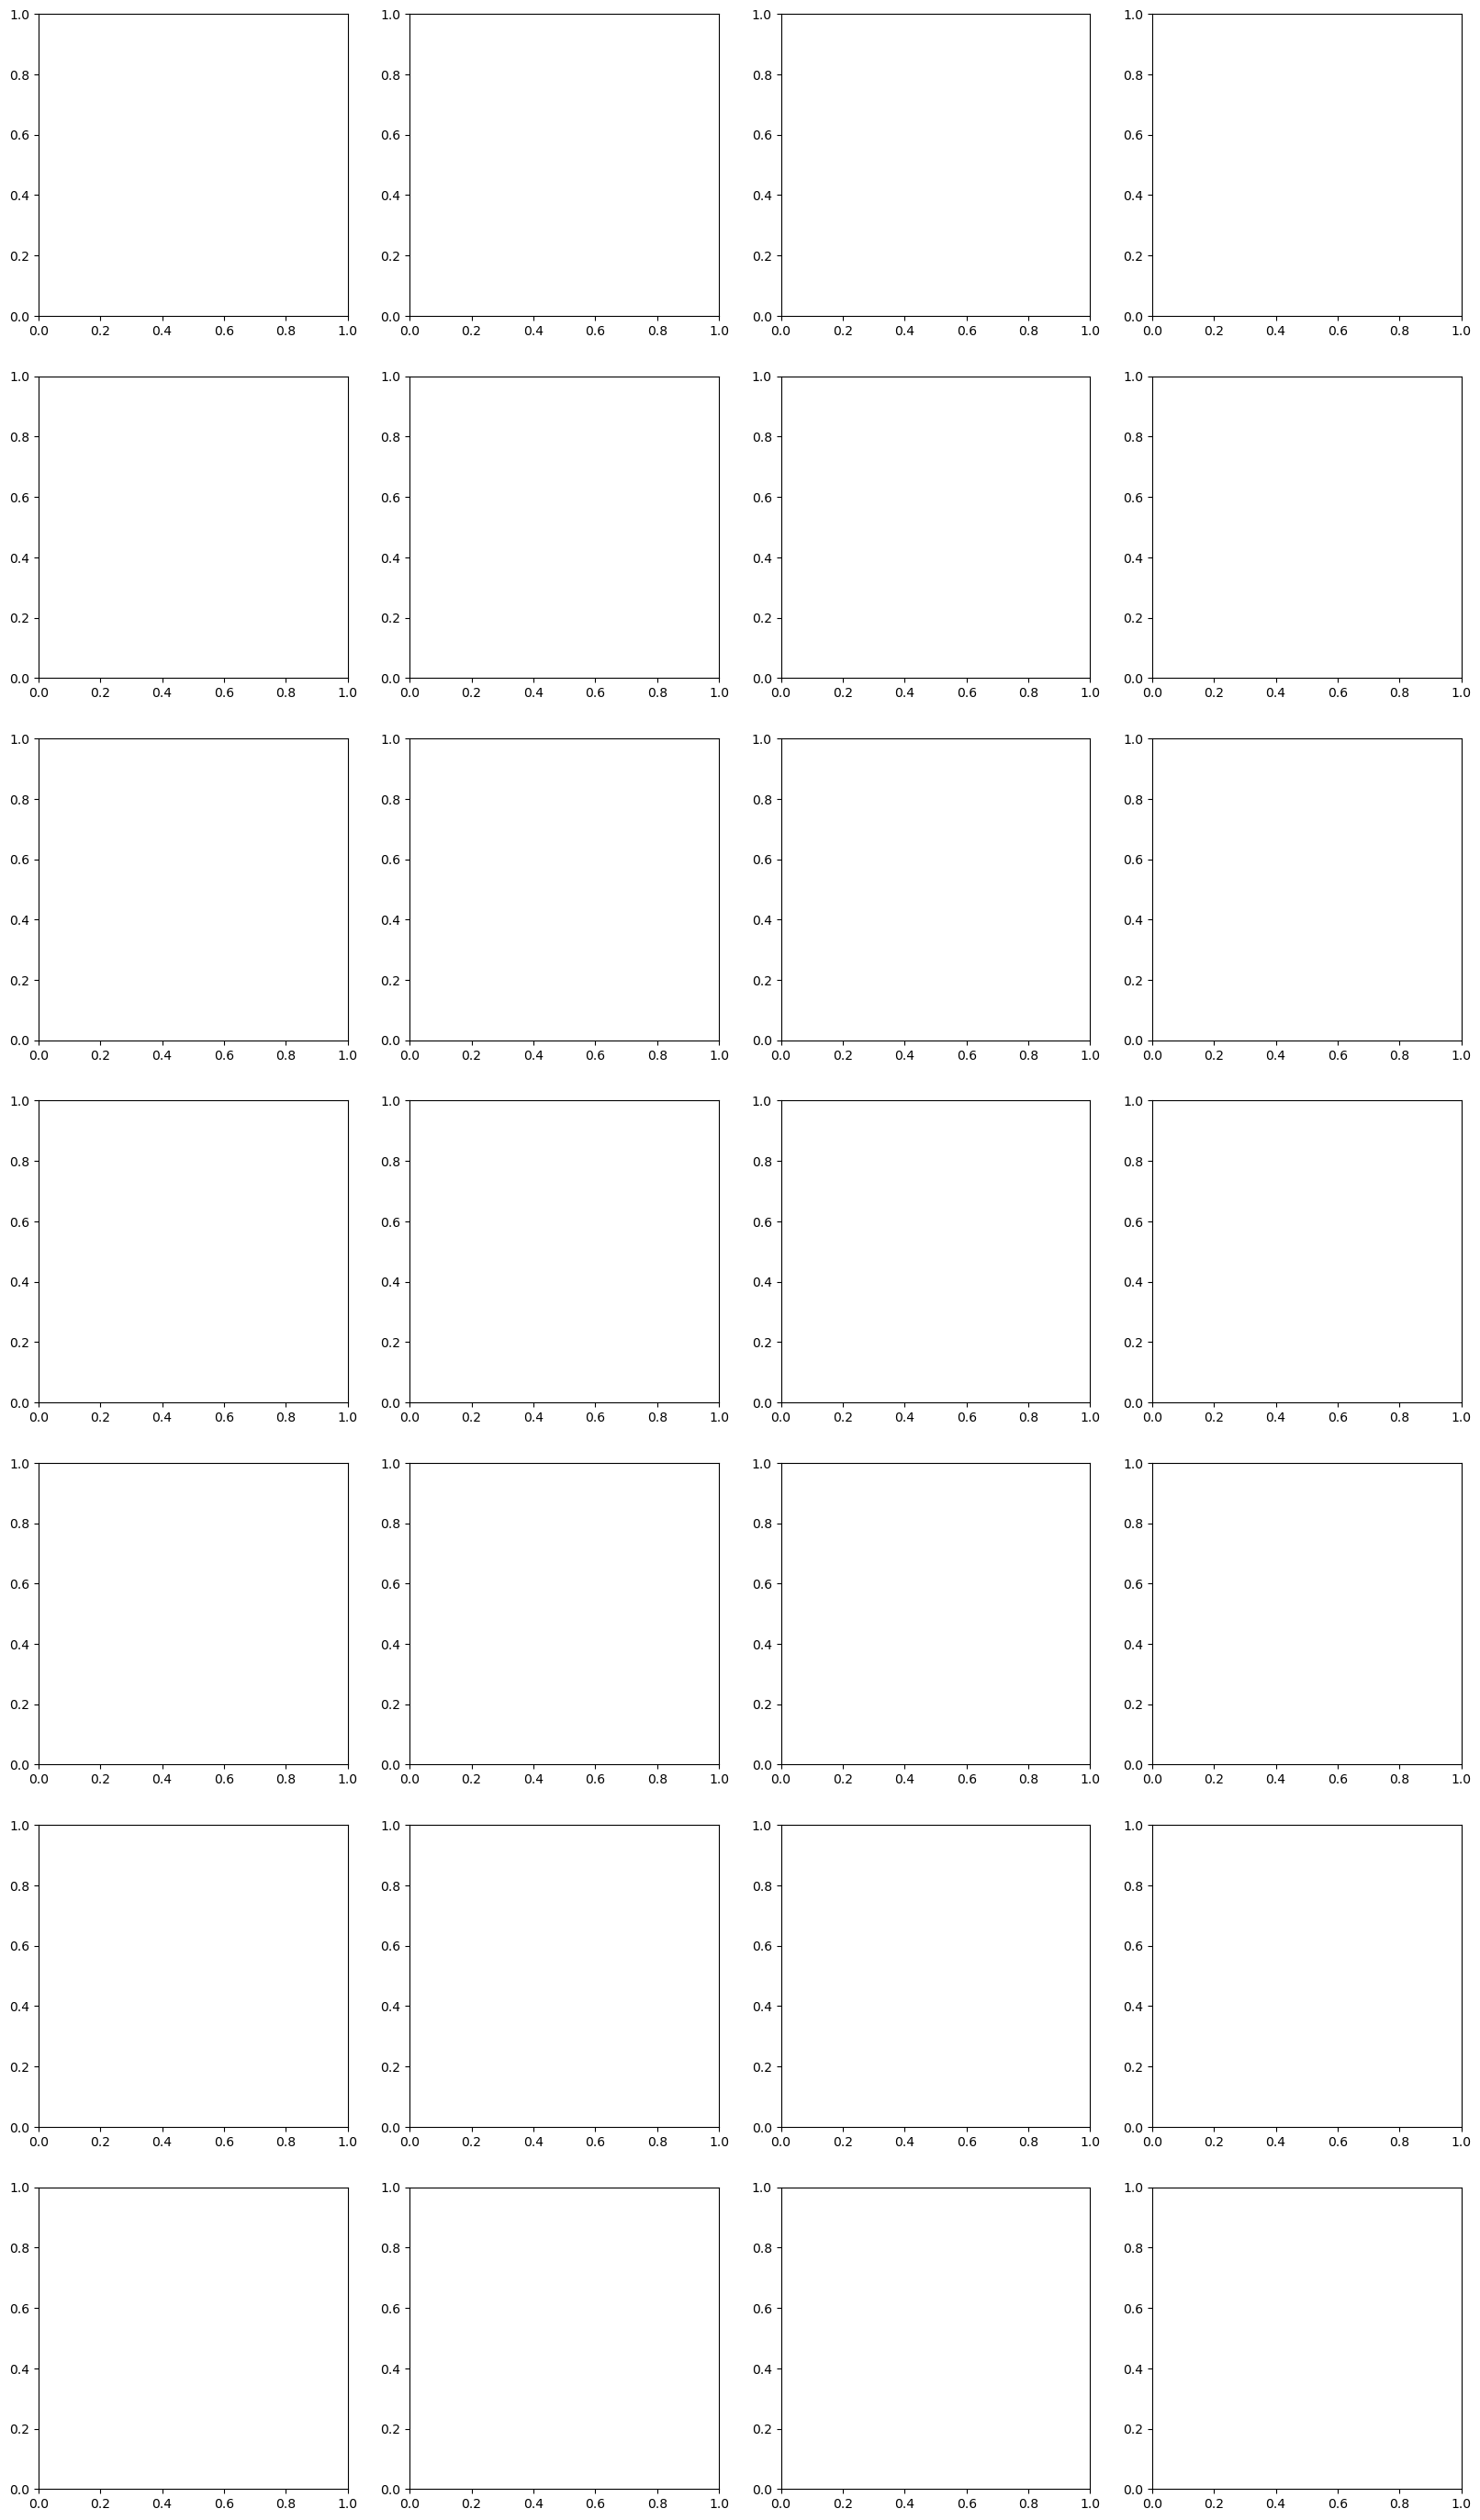

In [3]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from tqdm import tqdm

features_to_plot = [
    'Aspect', 'temperature_2m_spatial', 'uv_radiation_spatial', 'icefree_area_ratio_spatial',
    'solar_radiation_spatial', 'volumetric_soil_water_spatial', 'runoff_spatial', 'X10m_wind_speed_spatial',
    'precipitation_spatial', 'vapor_pressure_deficit_spatial', 'temperature_2m_temporal', 'uv_radiation_temporal',
    'icefree_area_ratio_temporal', 'solar_radiation_temporal', 'volumetric_soil_water_temporal', 'runoff_temporal',
    'X10m_wind_speed_temporal', 'precipitation_temporal', 'vapor_pressure_deficit_temporal', 'temperature_2m_residual',
    'uv_radiation_residual', 'icefree_area_ratio_residual', 'solar_radiation_residual', 'volumetric_soil_water_residual',
    'runoff_residual', 'X10m_wind_speed_residual', 'precipitation_residual', 'vapor_pressure_deficit_residual'
]

# 每行显示的子图数量
n_cols = 4
n_rows = int(np.ceil(len(features_to_plot) / n_cols))

# 创建画布
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # 将子图对象展平成一维数组

# 绘制每个特征的部分依赖图
for i, feature in tqdm(enumerate(features_to_plot)):
    PartialDependenceDisplay.from_estimator(
        #rf_model,
        model,
        X=df_full[features_to_plot],
        features=[feature],
        ax=axes[i],
    )
    axes[i].set_title(f'Partial Dependence: {feature}')

# 删除多余的子图（如果特征数量不是子图总数的整数倍）
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Partial Dependence Plots for All Features', fontsize=16, y=1.02)
plt.show()

# Combine all feature data into one DataFrame
pdp_df = pd.concat(partial_dependence_data, ignore_index=True)

# Save to CSV
pdp_df.to_csv("G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\partial_dependence_results.csv", index=False)

print("Partial dependence results saved as 'partial_dependence_results.csv'")

In [64]:
features_to_plot

['Aspect',
 'temperature_2m_spatial',
 'uv_radiation_spatial',
 'icefree_area_ratio_spatial',
 'solar_radiation_spatial',
 'volumetric_soil_water_spatial',
 'runoff_spatial',
 'X10m_wind_speed_spatial',
 'precipitation_spatial',
 'vapor_pressure_deficit_spatial',
 'temperature_2m_temporal',
 'uv_radiation_temporal',
 'icefree_area_ratio_temporal',
 'solar_radiation_temporal',
 'volumetric_soil_water_temporal',
 'runoff_temporal',
 'X10m_wind_speed_temporal',
 'precipitation_temporal',
 'vapor_pressure_deficit_temporal',
 'temperature_2m_residual',
 'uv_radiation_residual',
 'icefree_area_ratio_residual',
 'solar_radiation_residual',
 'volumetric_soil_water_residual',
 'runoff_residual',
 'X10m_wind_speed_residual',
 'precipitation_residual',
 'vapor_pressure_deficit_residual']

In [ ]:
import itertools
import pandas as pd
import numpy as np
import pymannkendall as mk
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

# 加载数据集
df_full = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv')

# 定义要去趋势的基本变量列表
base_variables = ['temperature_2m', 'solar_radiation', 'uv_radiation', 'volumetric_soil_water', 'runoff', 'X10m_wind_speed', 'precipitation', 'vapor_pressure_deficit']

# 生成所有可能的变量组合
all_combinations = []
for r in range(1, len(base_variables) + 1):
    combinations = itertools.combinations(base_variables, r)
    all_combinations.extend(combinations)

# 函数：去趋势并计算预测年度植被面积
def detrend_and_predict(df, variable_components):
    # 去趋势处理
    detrended_df = detrend_data(df, variable_components)
    predictors = [col for col in detrended_df.columns if 'land_area' not in col]
    X = detrended_df[predictors]
    detrended_df['predicted_ratio'] = rf_model.predict(X)
    detrended_df['predicted_area'] = detrended_df['land_area'] * detrended_df['predicted_ratio']
    yearly_area = detrended_df.groupby('year')['predicted_area'].sum()
    return yearly_area

# 存储 MK 测试结果
mk_results = pd.DataFrame()

# 对每个变量组合进行去趋势处理并执行 MK 测试
for combination in all_combinations:
    yearly_area = detrend_and_predict(df_full, combination)
    result = mk.original_test(yearly_area)
    mk_results = mk_results.append({
        'variables': ', '.join(combination),
        'p_value': result.p,
        'tau': result.tau
    }, ignore_index=True)

# 输出 MK 测试结果
print(mk_results.sort_values(by='p_value'))

# 可选：可视化不同变量组合的 MK 测试结果
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(mk_results['tau'], mk_results['p_value'], color='blue')
plt.xlabel('Kendall Tau')
plt.ylabel('P Value')
plt.title('MK Test Results for Different Variable Combinations')
plt.axhline(y=0.05, color='r', linestyle='--')  # 显示显著性水平
plt.show()

In [63]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the filtered dataset
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv')

# Define the features used during training (excluding non-feature columns)
predictors = [col for col in df.columns if col not in ['Num', 'land_area', 'vegetation_area_ratio', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude']]

# Initialize the results DataFrame with the correct columns
results = pd.DataFrame(index=df['year'].unique(), columns=predictors)

# Assume rf_model is your trained RandomForestRegressor model
# Original data prediction
X_original = df[predictors]  # Use predictors directly here
df['original_predicted_ratio'] = rf_model.predict(X_original)
df['original_predicted_area'] = df['land_area'] * df['original_predicted_ratio']
df['Total_area'] = df['land_area'] * df['vegetation_area_ratio']
original_yearly_predicted_area = df.groupby('year')['original_predicted_area'].sum()
original_yearly_actual_area = df.groupby('year')['Total_area'].sum()

# Detrend and predict for each predictor
for predictor in tqdm(predictors):  # Iterate over predictors directly
    # Detrend this predictor
    tmp_df = df.copy()
    model = LinearRegression()
    for pixel_id in tmp_df['pixel'].unique():
        pixel_data = tmp_df[tmp_df['pixel'] == pixel_id]
        if len(pixel_data) > 1:  # Ensure there's enough data to fit a model
            model.fit(pixel_data['year'].values.reshape(-1, 1), pixel_data[predictor].values)
            trend = model.predict(pixel_data['year'].values.reshape(-1, 1))
            # Adjusting detrended data to start at the same point as original data
            adjusted_detrended_data = pixel_data[predictor] - trend + trend[0]
            tmp_df.loc[tmp_df['pixel'] == pixel_id, predictor] = adjusted_detrended_data
        else:
            print(f"Not enough data to fit a model for pixel {pixel_id}")
    
    # Predict using the modified dataset
    X = tmp_df[predictors]  # Use predictors directly here
    tmp_df['predicted_ratio'] = rf_model.predict(X)  # Assuming rf_model is the correct variable name
    
    # Calculate predicted vegetated area
    tmp_df['predicted_area'] = tmp_df['land_area'] * tmp_df['predicted_ratio']
    yearly_area = tmp_df.groupby('year')['predicted_area'].sum()
    
    # Store the results
    results[predictor] = yearly_area

100%|██████████████████████████████████████████████████████████| 25/25 [02:10<00:00,  5.20s/it]


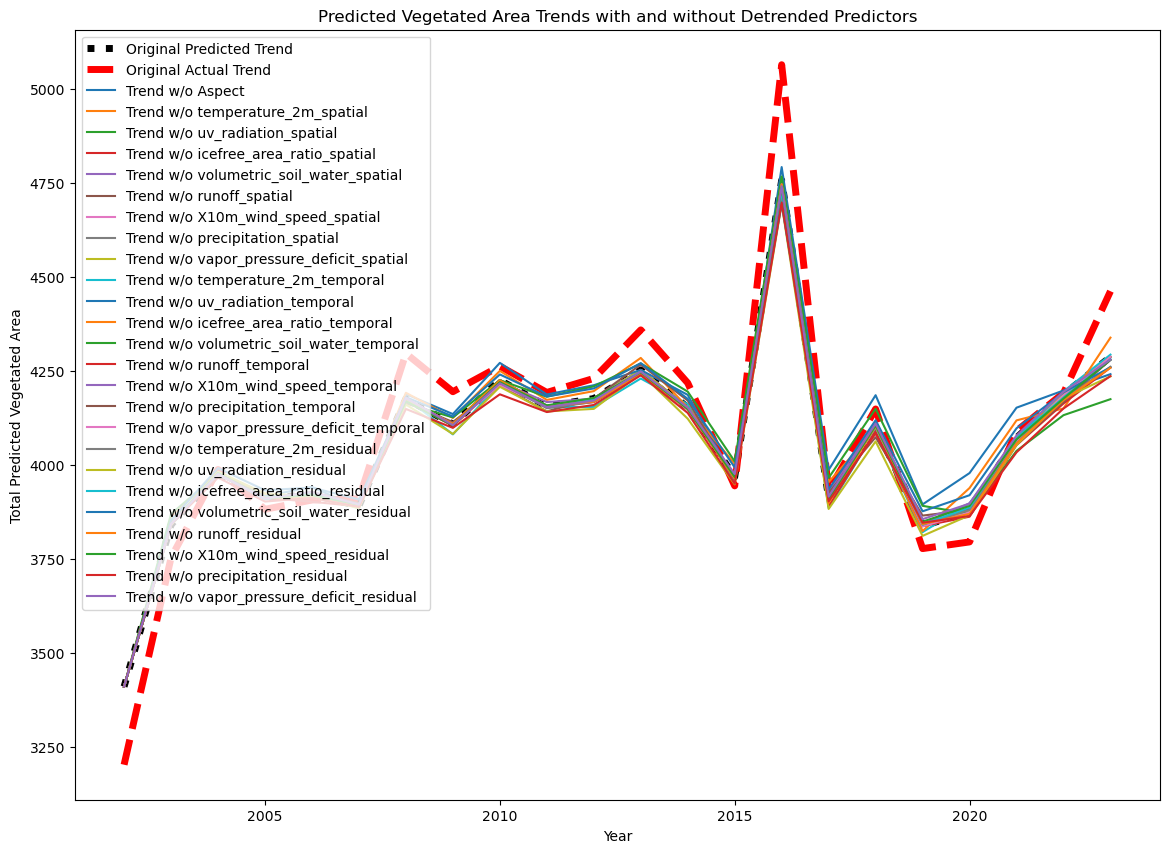

In [65]:
# Plot the results
plt.figure(figsize=(14, 10))
plt.plot(original_yearly_predicted_area.index, original_yearly_predicted_area, label='Original Predicted Trend', color='black', linewidth=5,linestyle = ':')
plt.plot(original_yearly_actual_area.index, original_yearly_actual_area, label='Original Actual Trend', color='red', linewidth=5, linestyle = '--')
for predictor in predictors:
    plt.plot(results.index, results[predictor], label=f'Trend w/o {predictor}')
plt.title('Predicted Vegetated Area Trends with and without Detrended Predictors')
plt.xlabel('Year')
plt.ylabel('Total Predicted Vegetated Area')
plt.legend()
plt.show()

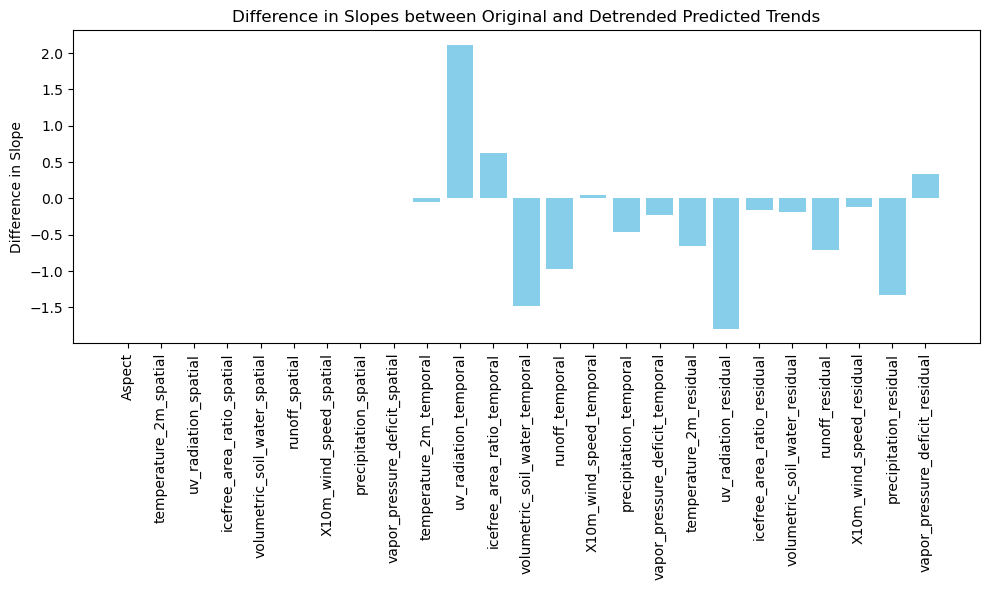

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to calculate slope
def calculate_slope(years, values):
    slope, intercept, r_value, p_value, std_err = linregress(years, values)
    return slope

# Load your years and values
years = np.array(df['year'].unique())

# Original trend slope
original_slope = calculate_slope(years, original_yearly_predicted_area)

# Calculate and compare slopes for each detrended trend
slope_differences = {}
for predictor in results.columns:
    detrended_slope = calculate_slope(years, results[predictor])
    slope_differences[predictor] = detrended_slope - original_slope

# Plotting the slope differences
predictors = list(slope_differences.keys())
differences = [slope_differences[pred] for pred in predictors]

plt.figure(figsize=(10, 6))
plt.bar(predictors, differences, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Difference in Slope')
plt.title('Difference in Slopes between Original and Detrended Predicted Trends')
plt.tight_layout()
plt.show()

In [10]:
# Initialize the results DataFrame with the correct columns
results = pd.DataFrame(index=df['year'].unique(), columns=predictors)

# Original data prediction
X_original = df[predictors]
df['original_predicted_ratio'] = rf_model.predict(X_original)
df['original_predicted_area'] = df['land_area'] * df['original_predicted_ratio']
df['Total_area'] = df['land_area'] * df['vegetation_area_ratio']
original_yearly_predicted_area = df.groupby('year')['original_predicted_area'].sum()
original_yearly_actual_area = df.groupby('year')['Total_area'].sum()

# Set each predictor to the first year's value for its corresponding pixel
for predictor in tqdm(predictors):
    tmp_df = df.copy()
    
    # Set each pixel's predictor value to its value in the first year
    for pixel_id in tmp_df['pixel'].unique():
        pixel_data = tmp_df[tmp_df['pixel'] == pixel_id]
        if not pixel_data.empty:
            first_year_value = pixel_data[predictor].iloc[0]
            tmp_df.loc[tmp_df['pixel'] == pixel_id, predictor] = first_year_value
    
    # Predict using the modified dataset
    X = tmp_df[predictors]
    tmp_df['predicted_ratio'] = rf_model.predict(X)
    
    # Calculate predicted vegetated area
    tmp_df['predicted_area'] = tmp_df['land_area'] * tmp_df['predicted_ratio']
    yearly_area = tmp_df.groupby('year')['predicted_area'].sum()
    
    # Store the results
    results[predictor] = yearly_area

100%|██████████████████████████████████████████████████████████| 25/25 [00:51<00:00,  2.05s/it]


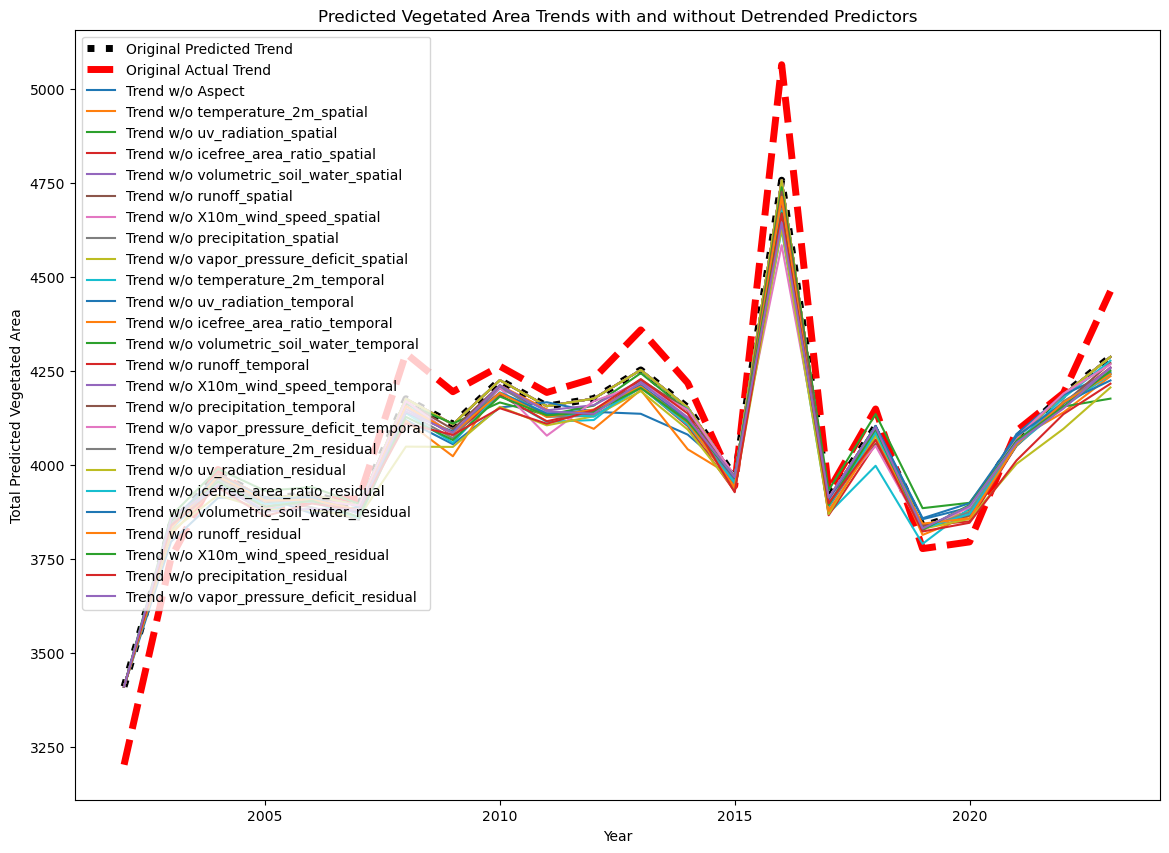

In [11]:
# Plot the results
plt.figure(figsize=(14, 10))
plt.plot(original_yearly_predicted_area.index, original_yearly_predicted_area, label='Original Predicted Trend', color='black', linewidth=5,linestyle = ':')
plt.plot(original_yearly_actual_area.index, original_yearly_actual_area, label='Original Actual Trend', color='red', linewidth=5, linestyle = '--')
for predictor in predictors:
    plt.plot(results.index, results[predictor], label=f'Trend w/o {predictor}')
plt.title('Predicted Vegetated Area Trends with and without Detrended Predictors')
plt.xlabel('Year')
plt.ylabel('Total Predicted Vegetated Area')
plt.legend()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to calculate slope
def calculate_slope(years, values):
    slope, intercept, r_value, p_value, std_err = linregress(years, values)
    return slope

# Load your years and values
years = np.array(df['year'].unique())

# Original trend slope
original_slope1 = calculate_slope(years, original_yearly_actual_area)
original_slope = calculate_slope(years, original_yearly_predicted_area)

# Calculate and compare slopes for each detrended trend
slope_differences = {}
for predictor in results.columns:
    detrended_slope = calculate_slope(years, results[predictor])
    slope_differences[predictor] = detrended_slope - original_slope

# Plotting the slope differences
predictors = list(slope_differences.keys())
differences = [slope_differences[pred] for pred in predictors]

plt.figure(figsize=(10, 6))
plt.bar(predictors, differences, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Difference in Slope')
plt.title('Difference in Slopes between Original and Detrended Predicted Trends')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [106]:
from itertools import combinations
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

# Filter predictors to exclude spatial variables and Aspect
all_vars = [
    'temperature_2m_temporal', 'uv_radiation_temporal', 'icefree_area_ratio_temporal',
    'volumetric_soil_water_temporal', 'runoff_temporal', 'X10m_wind_speed_temporal',
    'precipitation_temporal', 'vapor_pressure_deficit_temporal'
]


# Generate combinations for sizes 2, 3, 4, 5
combination_sizes = [1, 2, 3, 4, 5]
# combination_sizes = [1]
combinations_to_detrend = {
    size: list(combinations(all_vars, size)) for size in combination_sizes
}

In [107]:
# List of predictors used in the trained model (ensure this matches exactly the training set)
trained_predictors = rf_model.feature_names_in_  # Get the original feature names used during training

# Prepare a DataFrame to store slope differences
slope_results = []
slope_results = pd.DataFrame(columns=['Combination', 'Slope_Difference', 'Area_Series'])

# Ensure feature order matches training set
trained_predictors = rf_model.feature_names_in_  # Fetch predictors used during training

# Iterate over each combination size
for size, combos in tqdm(combinations_to_detrend.items(), desc="Combination Sizes"):
    for combo in tqdm(combos, desc=f"Processing combinations of size {size}", leave=False):
        tmp_df = df.copy()
        
        # Detrend each variable in the combination independently
        for var in combo:
            model = LinearRegression()
            for pixel_id in tmp_df['pixel'].unique():
                pixel_data = tmp_df[tmp_df['pixel'] == pixel_id]
                if len(pixel_data) > 1:  # Ensure enough data to fit a model
                    # Fit linear model to determine the trend
                    X = pixel_data['year'].values.reshape(-1, 1)
                    y = pixel_data[var].values
                    model.fit(X, y)
                    trend = model.predict(X)
                    
                    # Adjust this variable to remove the trend
                    adjusted_detrended_data = pixel_data[var] - trend + trend[0]
                    tmp_df.loc[tmp_df['pixel'] == pixel_id, var] = adjusted_detrended_data
        
        # Add missing predictors to tmp_df to ensure all trained predictors are present
        for col in trained_predictors:
            if col not in tmp_df.columns:
                tmp_df[col] = df[col]  # Copy from the original dataset

        # Align feature order to match training set
        X = tmp_df[trained_predictors]

        # Predict using the pretrained model
        try:
            tmp_df['predicted_ratio'] = rf_model.predict(X)
        except ValueError as e:
            print(f"Error during prediction: {e}")
            print(f"Feature mismatch detected. Predictors in training: {trained_predictors}")
            print(f"Current predictors: {list(X.columns)}")
            raise
        
        # Calculate total predicted and actual areas by year
        tmp_df['predicted_area'] = tmp_df['land_area'] * tmp_df['predicted_ratio']
        tmp_df['actual_area'] = tmp_df['original_predicted_ratio'] * tmp_df['land_area']
        
        yearly_predicted_area = tmp_df.groupby('year')['predicted_area'].sum()
        yearly_actual_area = tmp_df.groupby('year')['actual_area'].sum()
        
        # Fit regression lines to predicted and actual areas
        model_predicted = LinearRegression()
        model_actual = LinearRegression()
        
        years = yearly_predicted_area.index.values.reshape(-1, 1)
        model_predicted.fit(years, yearly_predicted_area.values)
        model_actual.fit(years, yearly_actual_area.values)
        
        # Calculate slope difference
        slope_diff = (model_predicted.coef_[0] - model_actual.coef_[0])
        
        # Create a new DataFrame for the current combination's slope difference
        new_row = pd.DataFrame([{'Combination': combo, 'Slope_Difference': slope_diff, 'Area_Series': yearly_predicted_area}])

        # Use pandas.concat instead of append
        slope_results = pd.concat([slope_results, new_row], ignore_index=True)

Processing combinations of size 4:  91%|█████████████████████  | 64/70 [18:54<01:46, 17.82s/it]


Combination Sizes: 100%|████████████████████████████████████████| 5/5 [59:28<00:00, 713.71s/it]


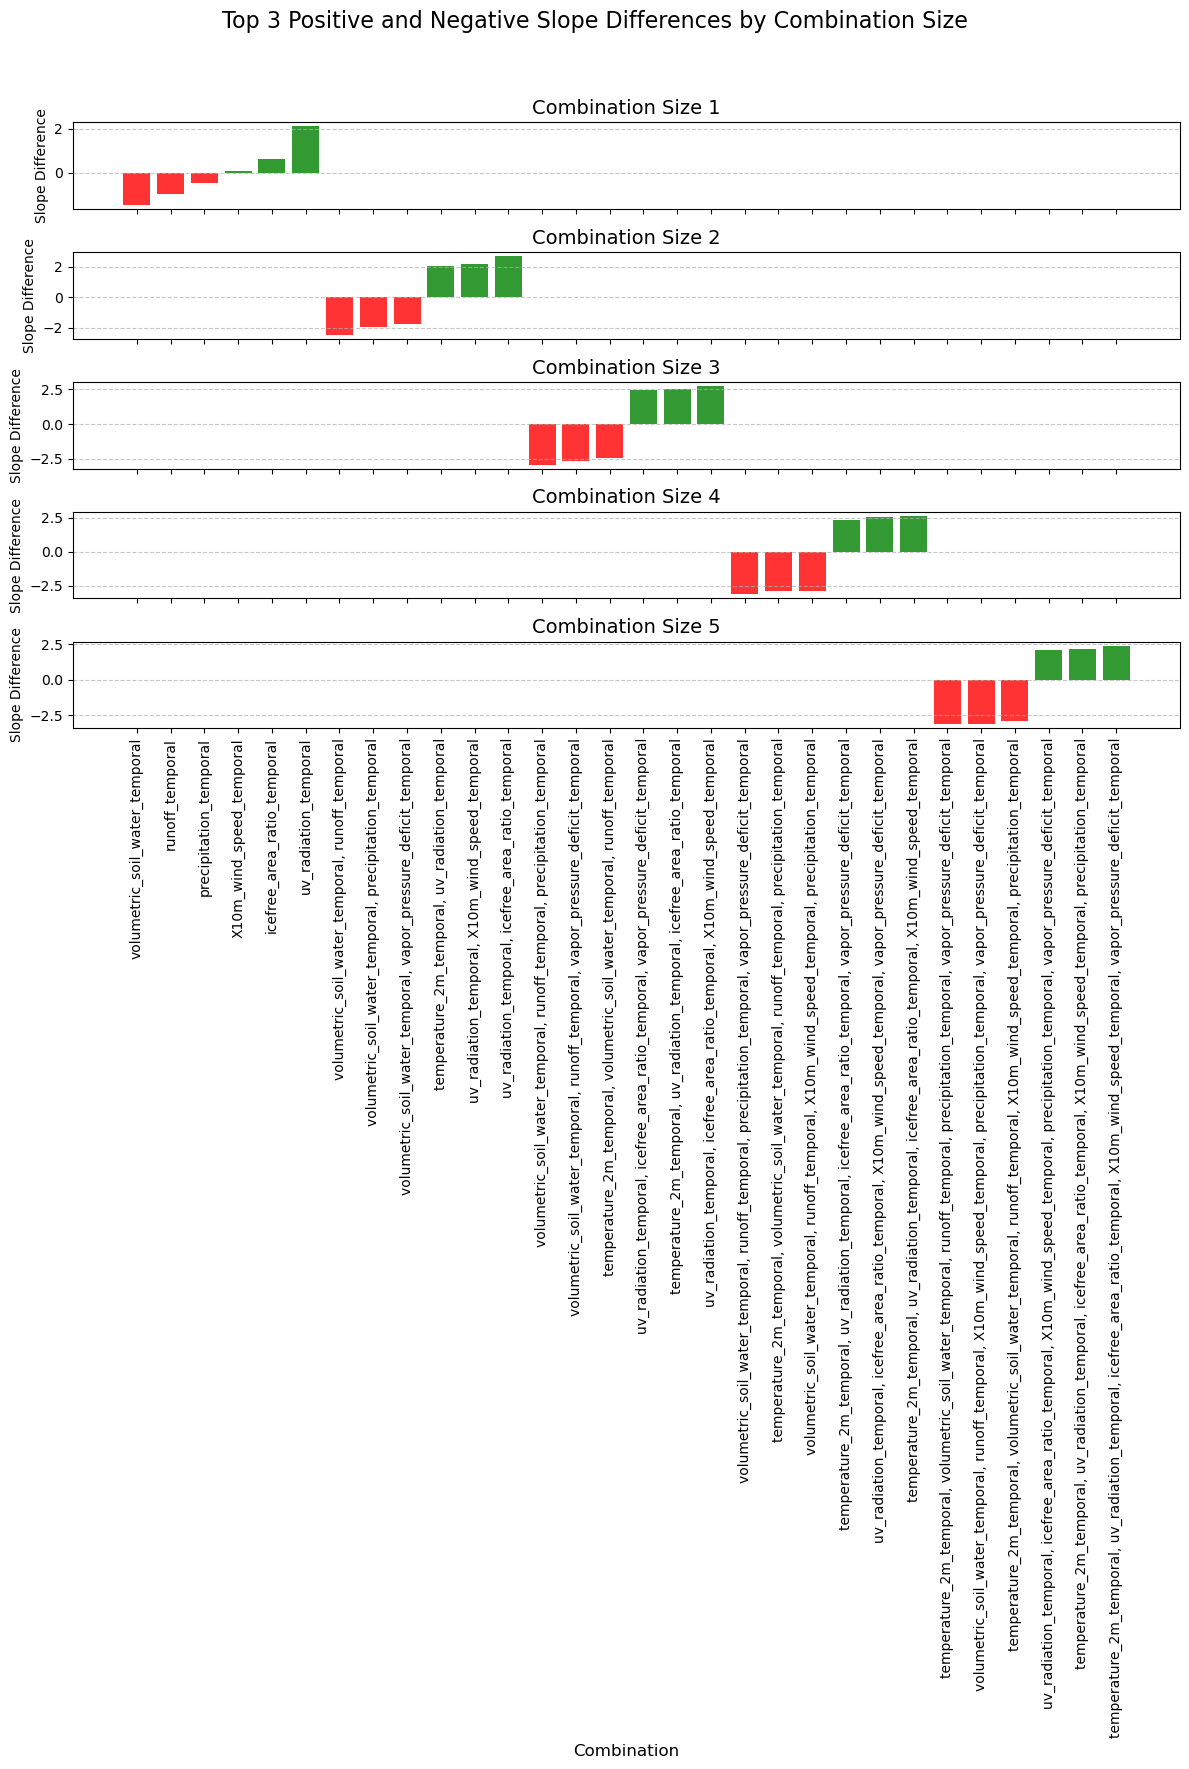

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure the combination size column exists in slope_results
slope_results['Combination_Size'] = slope_results['Combination'].apply(len)

# Define the number of combination sizes (1 to 5)
combination_sizes = sorted(slope_results['Combination_Size'].unique())

# Create subplots for each combination size
fig, axes = plt.subplots(len(combination_sizes), 1, figsize=(12, 18), sharex=True)
fig.suptitle("Top 3 Positive and Negative Slope Differences by Combination Size", fontsize=16)

for idx, size in enumerate(combination_sizes):
    # Filter for the current combination size
    size_results = slope_results[slope_results['Combination_Size'] == size]
    
    # Get top 3 positive and top 3 negative slope differences
    top_positive = size_results.nlargest(3, 'Slope_Difference')
    top_negative = size_results.nsmallest(3, 'Slope_Difference')
    top_results = pd.concat([top_positive, top_negative]).sort_values('Slope_Difference')
    
    # Prepare data for plotting
    x_labels = [', '.join(map(str, combo)) for combo in top_results['Combination']]
    y_values = top_results['Slope_Difference']
    
    # Plot the data
    axes[idx].bar(x_labels, y_values, color=['red' if val < 0 else 'green' for val in y_values], alpha=0.8)
    axes[idx].set_title(f"Combination Size {size}", fontsize=14)
    axes[idx].set_ylabel("Slope Difference")
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[idx].tick_params(axis='x', rotation=90, labelsize=10)

# Set common X-label
plt.xlabel("Combination", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the title
plt.show()


In [112]:
model_actual.coef_[0]

15.963535483139985

Detrending Predictors: 100%|███████████████████████████████████| 25/25 [01:49<00:00,  4.40s/it]


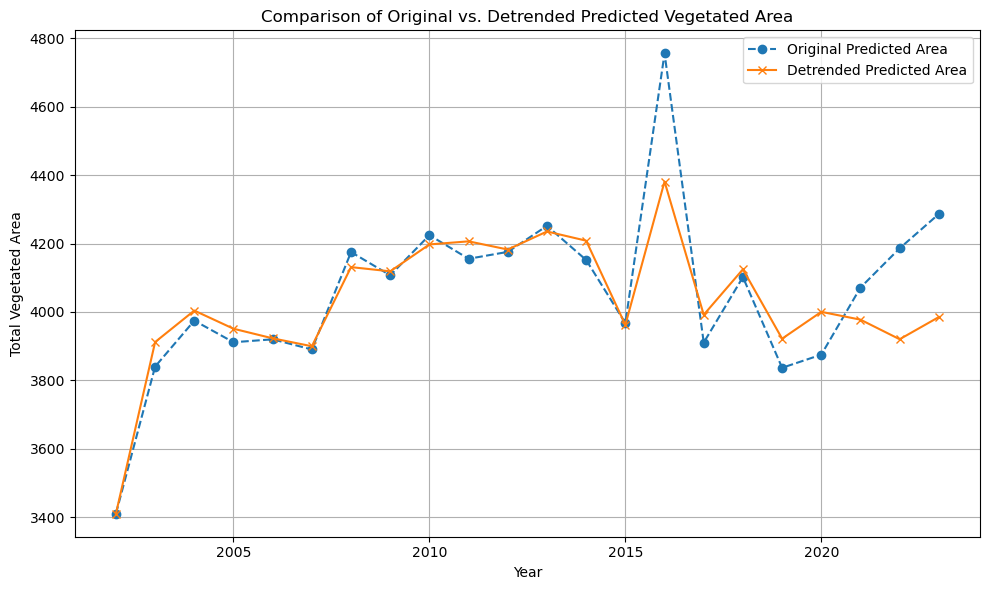

In [114]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the filtered dataset
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\filtered_data_complete_years.csv')

# Define the features used during training (excluding non-feature columns)
predictors = [col for col in df.columns if col not in ['Num', 'land_area', 'vegetation_area_ratio', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude']]

# Original data prediction
X_original = df[predictors]
df['original_predicted_ratio'] = rf_model.predict(X_original)
df['original_predicted_area'] = df['land_area'] * df['original_predicted_ratio']
df['Total_area'] = df['land_area'] * df['vegetation_area_ratio']
original_yearly_predicted_area = df.groupby('year')['original_predicted_area'].sum()
original_yearly_actual_area = df.groupby('year')['Total_area'].sum()

# Initialize the results DataFrame
results = pd.DataFrame(index=df['year'].unique(), columns=predictors)

# Detrend all predictors
tmp_df = df.copy()  # Work on a copy of the DataFrame
for predictor in tqdm(predictors, desc="Detrending Predictors"):
    model = LinearRegression()
    for pixel_id in tmp_df['pixel'].unique():
        pixel_data = tmp_df[tmp_df['pixel'] == pixel_id]
        if len(pixel_data) > 1:  # Ensure there's enough data to fit a model
            # Fit the linear model to determine the trend
            X = pixel_data['year'].values.reshape(-1, 1)
            y = pixel_data[predictor].values
            model.fit(X, y)
            trend = model.predict(X)
            
            # Adjust the predictor to remove the trend
            adjusted_detrended_data = pixel_data[predictor] - trend + trend[0]
            tmp_df.loc[tmp_df['pixel'] == pixel_id, predictor] = adjusted_detrended_data
        else:
            print(f"Not enough data to fit a model for pixel {pixel_id}")

# Predict using the modified dataset with all predictors detrended
X_detrended = tmp_df[predictors]  # Use the modified predictors
tmp_df['detrended_predicted_ratio'] = rf_model.predict(X_detrended)
tmp_df['detrended_predicted_area'] = tmp_df['land_area'] * tmp_df['detrended_predicted_ratio']

# Calculate yearly total predicted areas for detrended data
yearly_detrended_predicted_area = tmp_df.groupby('year')['detrended_predicted_area'].sum()

# Store the results
results['detrended'] = yearly_detrended_predicted_area

# Compare detrended vs original predictions
original_yearly_predicted_area = df.groupby('year')['original_predicted_area'].sum()
plt.figure(figsize=(10, 6))
plt.plot(original_yearly_predicted_area, label="Original Predicted Area", linestyle='--', marker='o')
plt.plot(yearly_detrended_predicted_area, label="Detrended Predicted Area", linestyle='-', marker='x')
plt.xlabel("Year")
plt.ylabel("Total Vegetated Area")
plt.title("Comparison of Original vs. Detrended Predicted Vegetated Area")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

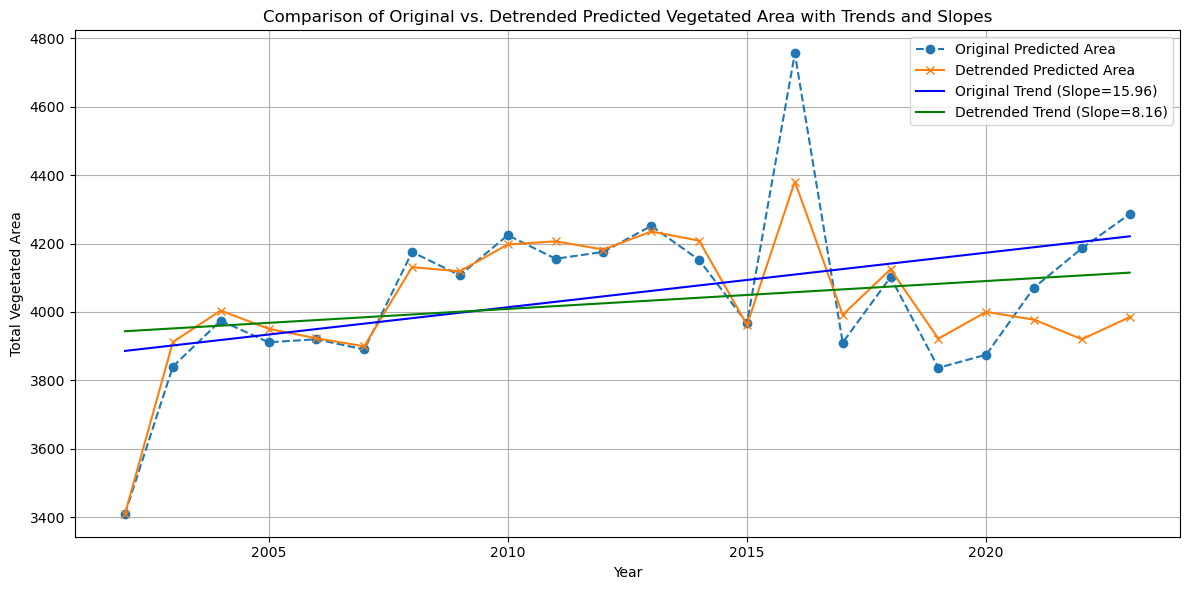

In [116]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Fit a trend line for the original predicted area
years = original_yearly_predicted_area.index.values.reshape(-1, 1)
original_values = original_yearly_predicted_area.values
model_original = LinearRegression()
model_original.fit(years, original_values)
original_trend = model_original.predict(years)
original_slope = model_original.coef_[0]

# Fit a trend line for the detrended predicted area
detrended_values = yearly_detrended_predicted_area.values
model_detrended = LinearRegression()
model_detrended.fit(years, detrended_values)
detrended_trend = model_detrended.predict(years)
detrended_slope = model_detrended.coef_[0]

# Plot the original and detrended predictions with their trends
plt.figure(figsize=(12, 6))
plt.plot(original_yearly_predicted_area, label="Original Predicted Area", linestyle='--', marker='o')
plt.plot(yearly_detrended_predicted_area, label="Detrended Predicted Area", linestyle='-', marker='x')
plt.plot(years, original_trend, label=f"Original Trend (Slope={original_slope:.2f})", linestyle='-', color='blue')
plt.plot(years, detrended_trend, label=f"Detrended Trend (Slope={detrended_slope:.2f})", linestyle='-', color='green')

# Add labels, title, legend, and grid
plt.xlabel("Year")
plt.ylabel("Total Vegetated Area")
plt.title("Comparison of Original vs. Detrended Predicted Vegetated Area with Trends and Slopes")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

In [117]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load the filtered dataset
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\filtered_data_complete_years.csv')

# Define the features used during training (excluding non-feature columns)
predictors = [col for col in df.columns if col not in ['Num', 'land_area', 'vegetation_area_ratio', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude']]

# Original data prediction
X_original = df[predictors]
df['original_predicted_ratio'] = rf_model.predict(X_original)
df['original_predicted_area'] = df['land_area'] * df['original_predicted_ratio']
df['Total_area'] = df['land_area'] * df['vegetation_area_ratio']
original_yearly_predicted_area = df.groupby('year')['original_predicted_area'].sum()
original_yearly_actual_area = df.groupby('year')['Total_area'].sum()

# Initialize the results DataFrame
results = pd.DataFrame(index=df['year'].unique(), columns=predictors)

# Detrend all predictors
tmp_df = df.copy()  # Work on a copy of the DataFrame
for predictor in tqdm(predictors, desc="Detrending Predictors"):
    model = LinearRegression()
    for pixel_id in tmp_df['pixel'].unique():
        pixel_data = tmp_df[tmp_df['pixel'] == pixel_id]
        if not pixel_data.empty:
            first_year_value = pixel_data[predictor].iloc[0]
            tmp_df.loc[tmp_df['pixel'] == pixel_id, predictor] = first_year_value
            
            tmp_df.loc[tmp_df['pixel'] == pixel_id, predictor] = adjusted_detrended_data
        else:
            print(f"Not enough data to fit a model for pixel {pixel_id}")

# Predict using the modified dataset with all predictors detrended
X_detrended = tmp_df[predictors]  # Use the modified predictors
tmp_df['detrended_predicted_ratio'] = rf_model.predict(X_detrended)
tmp_df['detrended_predicted_area'] = tmp_df['land_area'] * tmp_df['detrended_predicted_ratio']

# Calculate yearly total predicted areas for detrended data
yearly_detrended_predicted_area = tmp_df.groupby('year')['detrended_predicted_area'].sum()

# Store the results
results['detrended'] = yearly_detrended_predicted_area

# Compare detrended vs original predictions
original_yearly_predicted_area = df.groupby('year')['original_predicted_area'].sum()
plt.figure(figsize=(10, 6))
plt.plot(original_yearly_predicted_area, label="Original Predicted Area", linestyle='--', marker='o')
plt.plot(yearly_detrended_predicted_area, label="Detrended Predicted Area", linestyle='-', marker='x')
plt.xlabel("Year")
plt.ylabel("Total Vegetated Area")
plt.title("Comparison of Original vs. Detrended Predicted Vegetated Area")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Detrending Predictors: 100%|███████████████████████████████████| 25/25 [01:44<00:00,  4.18s/it]


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values